In [1]:
import pandas as pd
import numpy as np

df0 = pd.read_csv('model/ER_alpha_Train_final.csv', header = 0)

In [2]:
len(df0)

1231

In [3]:
df0.tail(2)

,STATUS,MW,LogP,nHAcc,nHDon,acdAcidicPka,acdBasicPka,acdLogd,acdLogp,alogp,...,reference,target_chemblid,target_confidence,target_name,units,value,STATUS.1,SMILES_desalt,pIC50,chemblId
1229,active,419.443,4.7098,3,2,4.06,6.57,-0.54,2.45,2.11,...,"ACS Med. Chem. Lett., (2016) 7:1:94",CHEMBL206,9,Estrogen receptor alpha,nM,NaN,active,CC(CF)CN1C(C)Cc2cc(O)ccc2C1c1c(F)cc(C=CC(=O)O)...,NaN,CHEMBL3775908
1230,active,296.410,3.6126,2,2,10.24,NaN,4.11,4.11,4.89,...,Unspecified,CHEMBL206,9,Estrogen receptor alpha,nM,NaN,active,C#CC1(O)CCC2C3CCc4cc(O)ccc4C3CCC21C,NaN,CHEMBL691


In [4]:
df = df0.drop(['STATUS.1'], axis=1)

In [5]:
df = df[['chemblId','pIC50']]

In [6]:
df.head()

,chemblId,pIC50
0,CHEMBL370037,8.221849
1,CHEMBL189073,5.762708
2,CHEMBL365290,6.943095
3,CHEMBL191648,6.278189
4,CHEMBL184431,8.657577


In [7]:
path = r'Fingerprint/'

Fp1  = pd.read_csv(path + 'Train_ER_alpha-Fingerprinter.csv'               , header = 0)
Fp2  = pd.read_csv(path + 'Train_ER_alpha-ExtendedFingerprinter.csv'       , header = 0)
Fp3  = pd.read_csv(path + 'Train_ER_alpha-EStateFingerprinter.csv'         , header = 0)
Fp4  = pd.read_csv(path + 'Train_ER_alpha-GraphOnlyFingerprinter.csv'      , header = 0)
Fp5  = pd.read_csv(path + 'Train_ER_alpha-MACCSFingerprinter.csv'          , header = 0)
Fp6  = pd.read_csv(path + 'Train_ER_alpha-PubchemFingerprinter.csv'        , header = 0)
Fp7  = pd.read_csv(path + 'Train_ER_alpha-SubstructureFingerprinter.csv'   , header = 0)
Fp8  = pd.read_csv(path + 'Train_ER_alpha-SubstructureFingerprintCount.csv', header = 0)
Fp9  = pd.read_csv(path + 'Train_ER_alpha-KlekotaRothFingerprinter.csv'    , header = 0)
Fp10 = pd.read_csv(path + 'Train_ER_alpha-KlekotaRothFingerprintCount.csv' , header = 0)
Fp11 = pd.read_csv(path + 'Train_ER_alpha-AtomPairs2DFingerprinter.csv'    , header = 0)
Fp12 = pd.read_csv(path + 'Train_ER_alpha-AtomPairs2DFingerprintCount.csv' , header = 0)

In [8]:
Fp1 = Fp1.rename(columns = {'Name':'chemblId'})
Fp2 = Fp2.rename(columns = {'Name':'chemblId'})
Fp3 = Fp3.rename(columns = {'Name':'chemblId'})
Fp4 = Fp4.rename(columns = {'Name':'chemblId'})
Fp5 = Fp5.rename(columns = {'Name':'chemblId'})
Fp6 = Fp6.rename(columns = {'Name':'chemblId'})
Fp7 = Fp7.rename(columns = {'Name':'chemblId'})
Fp8 = Fp8.rename(columns = {'Name':'chemblId'})
Fp9 = Fp9.rename(columns = {'Name':'chemblId'})
Fp10= Fp10.rename(columns = {'Name':'chemblId'})
Fp11= Fp11.rename(columns = {'Name':'chemblId'})
Fp12= Fp12.rename(columns = {'Name':'chemblId'})

In [9]:
from sklearn import preprocessing

def normalized (Fp):
    
    chemblId = Fp.chemblId
    Fp_ix = Fp.ix[:,1:]
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(Fp_ix)
    Fp_normalized = pd.DataFrame(np_scaled)
    Fp_normalized
    Fp_normalized = pd.DataFrame(np_scaled, columns=Fp_ix.columns)
    Fp_normalized['chemblId'] = chemblId
    
    return Fp_normalized

In [10]:
Fp1_n  = normalized (Fp1 )
Fp2_n  = normalized (Fp2 )
Fp3_n  = normalized (Fp3 )
Fp4_n  = normalized (Fp4 )
Fp5_n  = normalized (Fp5 )
Fp6_n  = normalized (Fp6 )
Fp7_n  = normalized (Fp7 )
Fp8_n  = normalized (Fp8 )
Fp9_n  = normalized (Fp9 )
Fp10_n = normalized (Fp10)
Fp11_n = normalized (Fp11)
Fp12_n = normalized (Fp12)

/Users/zeromtmu/anaconda2/envs/ER_alpha/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [13]:
Fp1_n .to_csv('Train_Fp_normalized/Fingerprinter.csv'               , sep=',' ,index=False)
Fp2_n .to_csv('Train_Fp_normalized/ExtendedFingerprinter.csv'       , sep=',' ,index=False)
Fp3_n .to_csv('Train_Fp_normalized/EStateFingerprinter.csv'         , sep=',' ,index=False)
Fp4_n .to_csv('Train_Fp_normalized/GraphOnlyFingerprinter.csv'      , sep=',' ,index=False)
Fp5_n .to_csv('Train_Fp_normalized/MACCSFingerprinter.csv'          , sep=',' ,index=False)
Fp6_n .to_csv('Train_Fp_normalized/PubchemFingerprinter.csv'        , sep=',' ,index=False)
Fp7_n .to_csv('Train_Fp_normalized/SubstructureFingerprinter.csv'   , sep=',' ,index=False)
Fp8_n .to_csv('Train_Fp_normalized/SubstructureFingerprintCount.csv', sep=',' ,index=False)
Fp9_n .to_csv('Train_Fp_normalized/KlekotaRothFingerprinter.csv'    , sep=',' ,index=False)
Fp10_n.to_csv('Train_Fp_normalized/KlekotaRothFingerprintCount.csv' , sep=',' ,index=False)
Fp11_n.to_csv('Train_Fp_normalized/AtomPairs2DFingerprinter.csv'    , sep=',' ,index=False)
Fp12_n.to_csv('Train_Fp_normalized/AtomPairs2DFingerprintCount.csv' , sep=',' ,index=False)

In [14]:
raw1  = df.merge(Fp1_n , on='chemblId', how='outer')
raw2  = df.merge(Fp2_n , on='chemblId', how='outer')
raw3  = df.merge(Fp3_n , on='chemblId', how='outer')
raw4  = df.merge(Fp4_n , on='chemblId', how='outer')
raw5  = df.merge(Fp5_n , on='chemblId', how='outer')
raw6  = df.merge(Fp6_n , on='chemblId', how='outer')
raw7  = df.merge(Fp7_n , on='chemblId', how='outer')
raw8  = df.merge(Fp8_n , on='chemblId', how='outer')
raw9  = df.merge(Fp9_n , on='chemblId', how='outer')
raw10 = df.merge(Fp10_n, on='chemblId', how='outer')
raw11 = df.merge(Fp11_n, on='chemblId', how='outer')
raw12 = df.merge(Fp12_n, on='chemblId', how='outer')

In [15]:
raw1 .set_index('chemblId', inplace=True) 
raw2 .set_index('chemblId', inplace=True) 
raw3 .set_index('chemblId', inplace=True) 
raw4 .set_index('chemblId', inplace=True) 
raw5 .set_index('chemblId', inplace=True) 
raw6 .set_index('chemblId', inplace=True) 
raw7 .set_index('chemblId', inplace=True)
raw8 .set_index('chemblId', inplace=True)
raw9 .set_index('chemblId', inplace=True)
raw10.set_index('chemblId', inplace=True)
raw11.set_index('chemblId', inplace=True)
raw12.set_index('chemblId', inplace=True)

In [16]:
raw1 .to_csv('QSAR/ER_alpha_Fingerprinter.csv'               , sep=',' ,index=True)
raw2 .to_csv('QSAR/ER_alpha_ExtendedFingerprinter.csv'       , sep=',' ,index=True)
raw3 .to_csv('QSAR/ER_alpha_EStateFingerprinter.csv'         , sep=',' ,index=True)
raw4 .to_csv('QSAR/ER_alpha_GraphOnlyFingerprinter.csv'      , sep=',' ,index=True)
raw5 .to_csv('QSAR/ER_alpha_MACCSFingerprinter.csv'          , sep=',' ,index=True)
raw6 .to_csv('QSAR/ER_alpha_PubchemFingerprinter.csv'        , sep=',' ,index=True)
raw7 .to_csv('QSAR/ER_alpha_SubstructureFingerprinter.csv'   , sep=',' ,index=True)
raw8 .to_csv('QSAR/ER_alpha_SubstructureFingerprintCount.csv', sep=',' ,index=True)
raw9 .to_csv('QSAR/ER_alpha_KlekotaRothFingerprinter.csv'    , sep=',' ,index=True)
raw10.to_csv('QSAR/ER_alpha_KlekotaRothFingerprintCount.csv' , sep=',' ,index=True)
raw11.to_csv('QSAR/ER_alpha_AtomPairs2DFingerprinter.csv'    , sep=',' ,index=True)
raw12.to_csv('QSAR/ER_alpha_AtomPairs2DFingerprintCount.csv' , sep=',' ,index=True)

In [17]:
print (len(raw1 ),len(raw2 ),len(raw3 ),len(raw4 ),len(raw5 )
      ,len(raw6 ),len(raw7 ),len(raw8 ),len(raw9 ),len(raw10)
      ,len(raw11),len(raw12))

(1231, 1231, 1231, 1231, 1231, 1231, 1231, 1231, 1231, 1231, 1231, 1231)


In [18]:
print (len(raw1 .columns),len(raw2 .columns),len(raw3 .columns),len(raw4 .columns),len(raw5 )
      ,len(raw6 .columns),len(raw7 .columns),len(raw8 .columns),len(raw9 .columns),len(raw10)
      ,len(raw11.columns),len(raw12.columns))

(1025, 1025, 80, 1025, 1231, 882, 308, 308, 4861, 1231, 781, 781)


# Build function

In [19]:
import numpy as np

def Remove_useless_descriptor(df, threshold):
    
    des1 = len(df.columns) 
    
    h = df.columns.tolist()
    df = df.as_matrix().astype(np.float)
    df = np.array(df)

    STDEV = np.std(df, axis=0)
    idx = [idx for idx, val in enumerate(STDEV) if val > threshold]
    df2 = df[:,idx]
    hx = np.array(h)[idx]
    
    df = pd.DataFrame(df2, columns=[hx])
    
    des2 = len(df.columns)
    
    print 'from Remove useless descriptor'
    print "The initial set of " + str(des1) + \
          " descriptors has been reduced to " + str(des2) + " descriptors."
    
    return df, des1, des2

In [20]:
from scipy import stats

def correlation(df, threshold):

    des3 = len(df.columns) 
    corr = stats.pearsonr
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df.columns:
                    del df[colname] # deleting the column from the dataset
    des4 = len(df.columns) 

    print 'from Remove correlation'
    print ("The initial set of " + str(des3) + ' descriptors'+ 
           " has been reduced to " + str(des4) + " descriptors.")

    return df, des3, des4

In [21]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import cross_validation
from collections import defaultdict

def build_model(X, Y, seed, hx, f):
    
    
    #Data split using 70/30 ratio
    X_internal, X_external, Y_internal, Y_external = train_test_split(X,
                                                        Y, test_size=0.3,
                                                        random_state=seed)

    # Training set
    rf = RandomForestRegressor(n_estimators=400, 
                               max_features='sqrt', 
                               min_samples_leaf = 1,
                               random_state = 13,
                               n_jobs=-1)
    
    rf.fit(X_internal,Y_internal)
    prediction = rf.predict(X_internal)
    
    # Cross-validation
    cv = cross_validation.cross_val_predict(rf, X_internal, Y_internal, cv=10, n_jobs=-1)
    
    # External set  
    prediction_external = rf.predict(X_external)
    
    #print result from each seed    
    R2_train.append(r2_score(Y_internal, prediction))
    RMSE_train.append(np.sqrt(mean_absolute_error(Y_internal, prediction)))
    Q2_CV.append(r2_score(Y_internal, cv))
    RMSE_CV.append(np.sqrt(mean_absolute_error(Y_internal, cv)))
    Q2_External.append(r2_score(Y_external, prediction_external))
    RMSE_External.append((mean_absolute_error(Y_external, prediction_external)))
    
    #Feature Importance
    Feature = hx[:]
    feature_importance = rf.feature_importances_
    importances = 100.0 * (feature_importance / feature_importance.max()) #index
    
    for i, fx in enumerate(Feature):
        importances_dict[fx].append(importances[i])
    
    return R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, Feature, \
           X_internal, X_external, Y_internal, Y_external, rf, prediction, importances_dict

/Users/zeromtmu/anaconda2/envs/ER_alpha/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
from copy import deepcopy

def Y_scrambling(X_internal, X_external, Y_internal, Y_external):
    # Do the Y-scrambling. Loop over the actual learning for 100 times.
    for randomseedcounter in range(1,101):
        y_train_scrambled = deepcopy(Y_internal)
        X_train_scrambled = deepcopy(X_internal)
        np.random.shuffle(y_train_scrambled)
        np.random.shuffle(X_train_scrambled)

        # training was done on "scrambled" data - prediction on test set
        RF_scrambled         = RandomForestRegressor()
        RF_scrambled         = RF_scrambled.fit(X_internal,y_train_scrambled)
        y_predict_scrambled  = RF_scrambled.predict(X_external)
    
        acclist_predictionOnTest_scrambledtrain.append((RF_scrambled.score(X_external,Y_external))**2)
    
        # training was done on "scrambled" data - prediction on train set
        y_predict_scrambled_predictTrain  = RF_scrambled.predict(X_internal)
    
        acclist_predictionOnTrain_scrambledtrain.append((RF_scrambled.score(X_internal,Y_internal))**2)
        
        r2 = pd.DataFrame(acclist_predictionOnTrain_scrambledtrain, columns=['R2'])
        q2 = pd.DataFrame(acclist_predictionOnTest_scrambledtrain, columns=['Q2'])

        #result = pd.concat([r2, q2], axis=1, join='inner').to_csv(f+"_Y_scrambling.csv", header=False, index=False)
        
        
    return acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain

In [23]:
def mean(R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, importances_dict):
    R2_train_mean = np.mean(R2_train)
    RMSE_train_mean = np.mean(RMSE_train)
    Q2_CV_mean = np.mean(Q2_CV)
    RMSE_CV_mean = np.mean(RMSE_CV)
    Q2_External_mean = np.mean(Q2_External)
    RMSE_External_mean = np.mean(RMSE_External)
    importances_mean0 = {}
    for fx in importances_dict:
        importances_mean0[fx] = np.mean(importances_dict[fx])
    importances_mean = sorted([(k,v) for k,v in importances_mean0.iteritems()],
                                    key=lambda x: x[1], reverse=True)
    
    #predictionOnTest_mean = np.mean(acclist_predictionOnTest_scrambledtrain)
    #predictionOnTrain_mean = np.mean(acclist_predictionOnTrain_scrambledtrain)
    
    return R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, \
            RMSE_External_mean, importances_mean

In [24]:
def std(R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, importances_dict):
    R2_train_std = np.std(R2_train)
    RMSE_train_std = np.std(RMSE_train)
    Q2_CV_std = np.std(Q2_CV)
    RMSE_CV_std = np.std(RMSE_CV)
    Q2_External_std = np.std(Q2_External)
    RMSE_External_std = np.std(RMSE_External)
    importances_std0 = {}
    for fx in importances_dict:
        importances_std0[fx] = np.std(importances_dict[fx])
    importances_std = sorted([(k,v) for k,v in importances_std0.iteritems()],
                                    key=lambda x: x[1], reverse=True)
    #predictionOnTest_std = np.std(acclist_predictionOnTest_scrambledtrain)
    #predictionOnTrain_std = np.std(acclist_predictionOnTrain_scrambledtrain)
    
    return R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std,\
            RMSE_External_std, importances_std

In [25]:
def print_output(R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, 
           RMSE_External_mean, R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std, 
           RMSE_External_std, X_internal, X_external, X, f, des1, des2 ):
    #outfile = open('all_output.csv', 'a')
    name = [os.path.basename(f)]
    print_out = name
    print_out = [name.replace('.smi','') for name in print_out]
    
    print >> outfile, '%s,%d,%d,%d,%d,%0.4f,%0.4f,%0.4f,%0.4f,%d,%0.4f,%0.4f,%0.4f,%0.4f,%d,%0.4f,%0.4f,%0.4f,%0.4f' \
                                     % (print_out, len(X_internal),
                                        des1, des2, des4,
                                        R2_train_mean, R2_train_std,
                                        RMSE_train_mean, RMSE_train_std,
                                        len(X_internal),
                                        Q2_CV_mean, Q2_CV_std,
                                        RMSE_CV_mean, RMSE_CV_std,
                                        len(X_external),
                                        Q2_External_mean, Q2_External_std,
                                        RMSE_External_mean, RMSE_External_std,)
 
    print '\nTraining set\n------------'
    print 'N: ' + (str(len(X_internal)))
    print 'R2: %0.4f'%(R2_train_mean)
    print 'std_R2: %0.4f'%(R2_train_std)
    print 'RMSE: %0.4f'%(RMSE_train_mean)
    print 'std_RMSE: %0.4f'%(RMSE_train_std)

    print '\nCross-validation set\n------------'
    print 'N: ' + (str(len(X_internal)))
    print 'Q2: %0.4f'%(Q2_CV_mean)
    print 'std_Q2: %0.4f'%(Q2_CV_std)
    print 'RMSE: %0.4f'%(RMSE_CV_mean)
    print 'std_RMSE: %0.4f'%(RMSE_CV_std)

    print '\nExternal set\n------------'
    print 'N: ' + (str(len(X_external)))
    print 'Q2_EXt: %0.4f'%(Q2_External_mean)
    print 'std_Q2_EXt: %0.4f'%(Q2_External_std)
    print 'RMSE: %0.4f'%(RMSE_External_mean)
    print 'std_RMSE: %0.4f'%(RMSE_External_std)

In [26]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pylab as py 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

def plot_model (f, X_internal, X_external, Y_internal, Y_external,
                R2_train_mean, Q2_External_mean,
                importances_mean, importances_std, Feature, prediction, 
                acclist_predictionOnTest_scrambledtrain, acclist_predictionOnTrain_scrambledtrain):
    
    # Prepare plot
    m  = rf.fit(X_internal,Y_internal)
    cm = plt.cm.RdBu
    cv = cross_validation.cross_val_predict(rf, X_internal, Y_internal, cv=10, n_jobs=-1)

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0]=5
    fig_size[1]=5

    # Train Set
    x_train = np.array(Y_internal)
    y_train = m.predict(X_internal).flatten()
    py.scatter(x_train, y_train, s=50, marker='.', alpha=0.3,
            c='g', cmap=cm ,edgecolors='g')
                 #label=r"$R^{2}_{Tr}$ = %.4f" % R2_train_mean)
    
    
    # CV Set
    np.array(cv)
    x_test = np.array(Y_internal)
    y_test = cv
    py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
            c='b', cmap=cm ,edgecolors='b') 
                 #label=r"$Q^{2}_{Ext}$ = %.4f" % Q2_External_mean)
        #2SD line
    X = sm.add_constant(x_test)
    res = sm.OLS(y_test, X).fit()

    st, data, ss2 = summary_table(res, alpha=0.05)
    fittedvalues = data[:,2]
        #predict_mean_se  = data[:,3]
    predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
    predict_ci_low, predict_ci_upp = data[:,6:8].T
        #2SD line
    plt.plot(X, predict_ci_low, '--b', linewidth=0.5, alpha=0.5)
    plt.plot(X, predict_ci_upp, '--b', linewidth=0.5, alpha=0.5)
        
    # External Set
    x_test = np.array(Y_external)
    y_test = m.predict(X_external).flatten()
    py.scatter(x_test, y_test, s=50, marker='.', alpha=0.3,
            c='r', cmap=cm ,edgecolors='r') 
                 #label=r"$Q^{2}_{Ext}$ = %.4f" % Q2_External_mean)
    
    
    #py.plot(x_train, np.polyval(np.polyfit(x_train,y_train,1), x_train), '--r') #mean line
    plt.legend(loc=2,prop={'size':6})
    plt.xlabel("Experimental $pIC_{50}$ values", fontsize=10)
    plt.ylabel("Predicted $pIC_{50}$ values", fontsize=10)
        
    min_axis = np.min(np.concatenate([Y_internal, prediction], axis=0))
    max_axis = np.max(np.concatenate([Y_internal, prediction], axis=0))
    plt.xlim([(min_axis*0.9),(max_axis*1.05)])
    plt.ylim([(min_axis*0.9),(max_axis*1.05)])
    plt.tick_params(axis='both', which='major', labelsize=14)

    
    # Save plot to file
    plt.savefig(f+'_compair_Fp.pdf', dpi=300)
    plt.show()
    
    # Y-scrambling plot
    py.scatter(Q2_CV_mean, R2_train_mean, s=100, marker='.', alpha=0.3,
            c='b', cmap=cm ,edgecolors='b') 
            
    py.scatter(acclist_predictionOnTest_scrambledtrain,acclist_predictionOnTrain_scrambledtrain, \
               s=100, marker='.', alpha=0.3, c='r', cmap=cm ,edgecolors='r')

    plt.legend(loc=2,prop={'size':6})
    plt.xlabel("$Q^{2}$", fontsize=10)
    plt.ylabel("$R^{2}$", fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=14)
    
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.axhline(0.5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
    plt.axvline(0.5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
    
    plt.savefig(f+'_Y_scrambling.pdf', dpi=300)

    plt.show()

    #Feature Importance 
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0]=5
    fig_size[1]=10

    barlist = plt.barh(range(20), [x[1] for x in importances_mean[:20]], 
          color="g", xerr=[x[1] for x in importances_std[:20]], align="center", \
                       error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2))

    print (str("top10"), [x[0] for x in importances_mean[:10]])
    print ('')
    print (str("top20"), [x[0] for x in importances_mean[:20]])
    print ('')
    print (str("top30"), [x[0] for x in importances_mean[:30]])
    print ('')
    print (str("top40"), [x[0] for x in importances_mean[:40]])
    print ('')
    print (str("top50"), [x[0] for x in importances_mean[:50]])
    
    plt.yticks(range(20), [x[0] for x in importances_mean[:20]])
    plt.ylim([-1, 20])
    
    plt.xlabel(r"$\bf{Gini}$" + " "+ r"$\bf{index}$", fontsize=12)
    ax = plt.gca()
    ax.invert_yaxis()
    plt.tight_layout(pad=2.0, w_pad=0.7, h_pad=2.0)
    plt.savefig(f+'_Feature_importances.pdf', dpi=300)
    plt.show()

/Users/zeromtmu/anaconda2/envs/ER_alpha/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Constructing the QSAR model


/Users/zeromtmu/anaconda2/envs/ER_alpha/lib/python2.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix




************************************************************************************

QSAR/ER_alpha_GraphOnlyFingerprinter.csv

from Remove useless descriptor
The initial set of 1024 descriptors has been reduced to 982 descriptors.
from Remove correlation
The initial set of 982 descriptors has been reduced to 599 descriptors.

Training set
------------
N: 861
R2: 0.9163
std_R2: 0.0042
RMSE: 0.5238
std_RMSE: 0.0035

Cross-validation set
------------
N: 861
Q2: 0.6914
std_Q2: 0.0105
RMSE: 0.7600
std_RMSE: 0.0063

External set
------------
N: 370
Q2_EXt: 0.7138
std_Q2_EXt: 0.0097
RMSE: 0.5663
std_RMSE: 0.0153


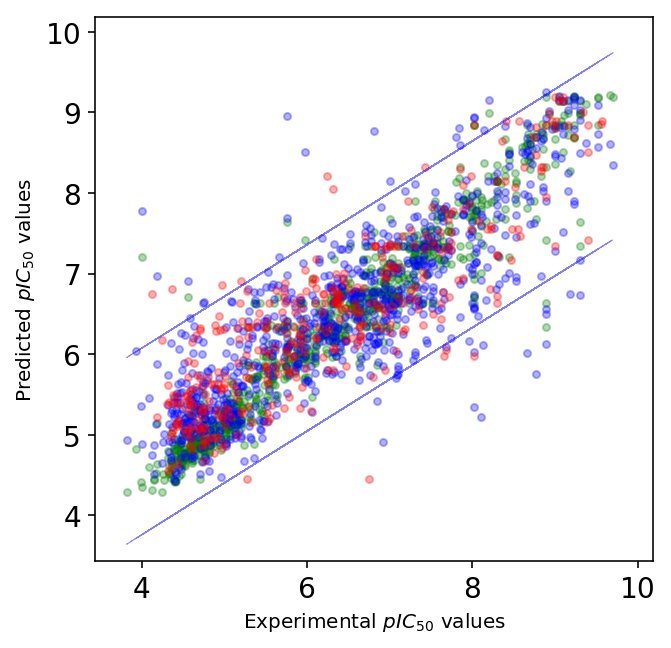

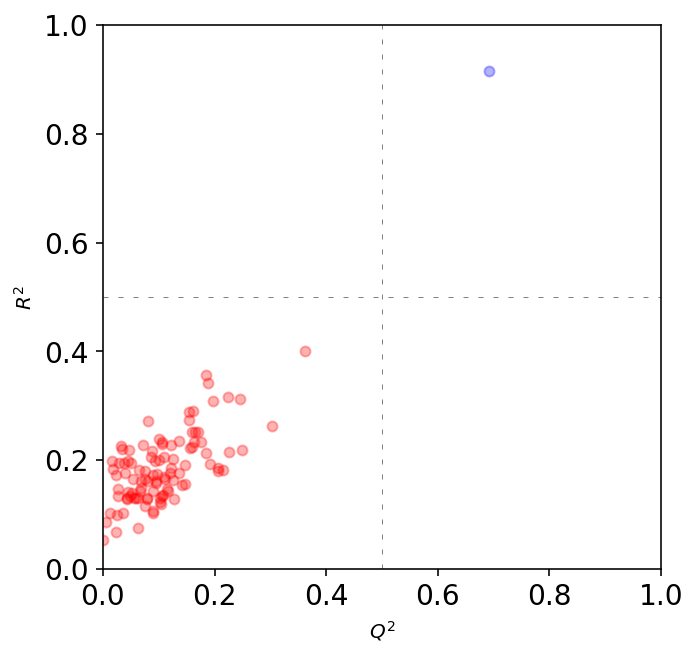

('top10', ['GraphFP60', 'GraphFP382', 'GraphFP83', 'GraphFP21', 'GraphFP342', 'GraphFP16', 'GraphFP140', 'GraphFP228', 'GraphFP224', 'GraphFP101'])

('top20', ['GraphFP60', 'GraphFP382', 'GraphFP83', 'GraphFP21', 'GraphFP342', 'GraphFP16', 'GraphFP140', 'GraphFP228', 'GraphFP224', 'GraphFP101', 'GraphFP394', 'GraphFP3', 'GraphFP163', 'GraphFP329', 'GraphFP72', 'GraphFP59', 'GraphFP270', 'GraphFP156', 'GraphFP462', 'GraphFP499'])

('top30', ['GraphFP60', 'GraphFP382', 'GraphFP83', 'GraphFP21', 'GraphFP342', 'GraphFP16', 'GraphFP140', 'GraphFP228', 'GraphFP224', 'GraphFP101', 'GraphFP394', 'GraphFP3', 'GraphFP163', 'GraphFP329', 'GraphFP72', 'GraphFP59', 'GraphFP270', 'GraphFP156', 'GraphFP462', 'GraphFP499', 'GraphFP89', 'GraphFP197', 'GraphFP387', 'GraphFP834', 'GraphFP298', 'GraphFP576', 'GraphFP918', 'GraphFP10', 'GraphFP529', 'GraphFP54'])

('top40', ['GraphFP60', 'GraphFP382', 'GraphFP83', 'GraphFP21', 'GraphFP342', 'GraphFP16', 'GraphFP140', 'GraphFP228', 'GraphFP224', 'GraphFP101

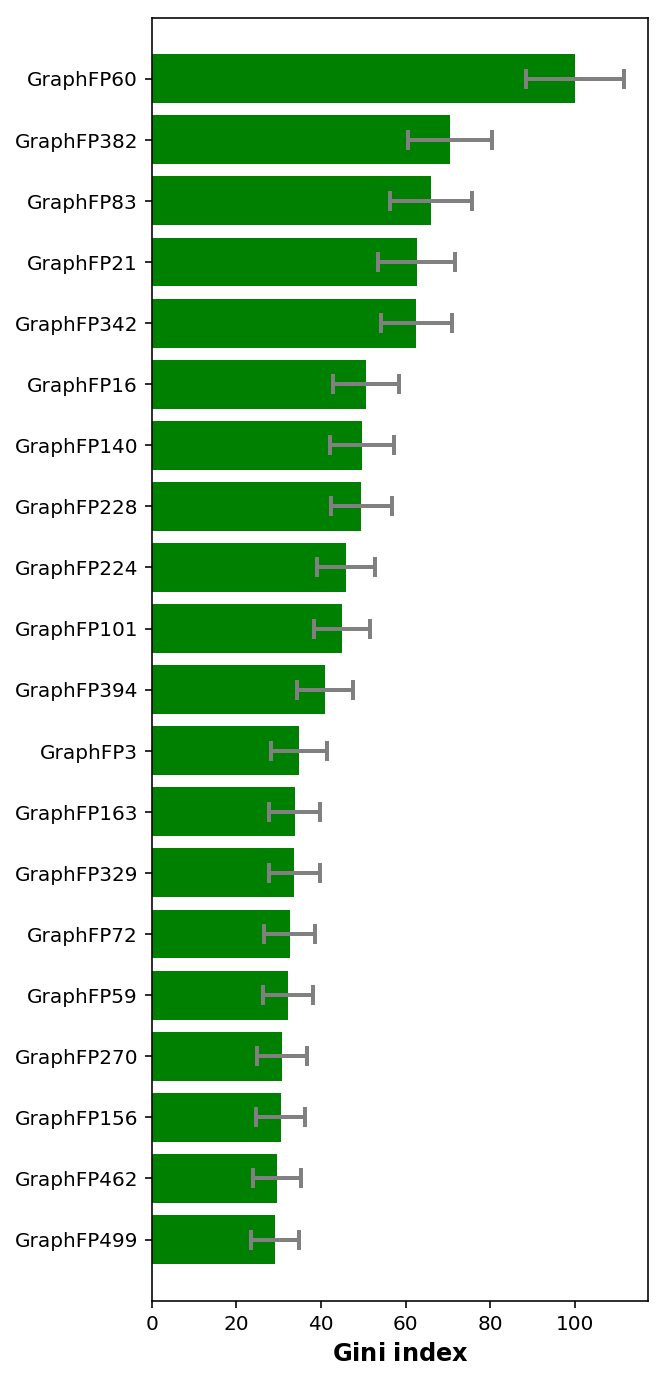



************************************************************************************

QSAR/ER_alpha_Fingerprinter.csv

from Remove useless descriptor
The initial set of 1024 descriptors has been reduced to 1021 descriptors.
from Remove correlation
The initial set of 1021 descriptors has been reduced to 934 descriptors.

Training set
------------
N: 861
R2: 0.9478
std_R2: 0.0029
RMSE: 0.4697
std_RMSE: 0.0031

Cross-validation set
------------
N: 861
Q2: 0.7002
std_Q2: 0.0083
RMSE: 0.7561
std_RMSE: 0.0050

External set
------------
N: 370
Q2_EXt: 0.7245
std_Q2_EXt: 0.0134
RMSE: 0.5585
std_RMSE: 0.0175


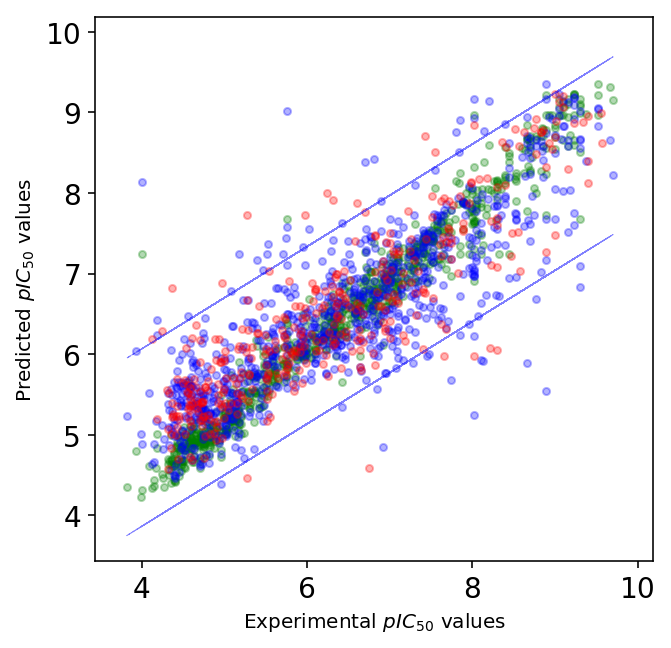

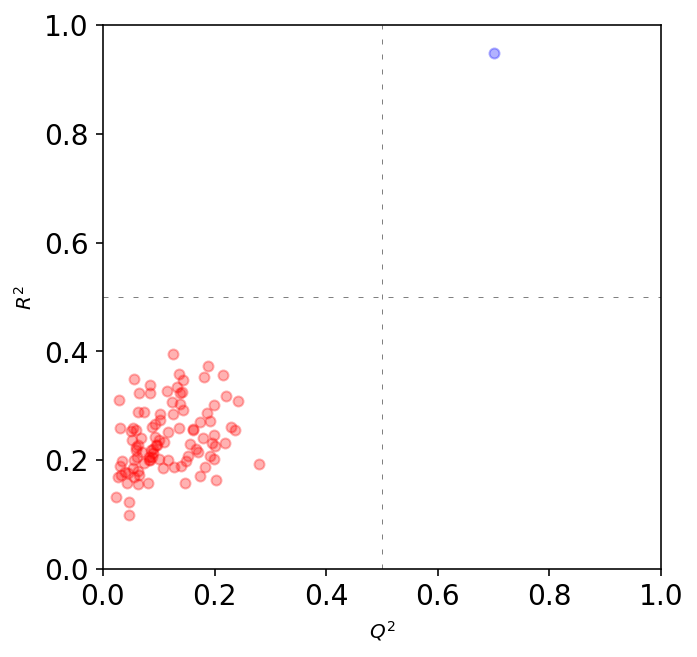

('top10', ['FP135', 'FP97', 'FP933', 'FP639', 'FP28', 'FP75', 'FP239', 'FP243', 'FP137', 'FP404'])

('top20', ['FP135', 'FP97', 'FP933', 'FP639', 'FP28', 'FP75', 'FP239', 'FP243', 'FP137', 'FP404', 'FP373', 'FP133', 'FP571', 'FP362', 'FP957', 'FP676', 'FP343', 'FP206', 'FP259', 'FP14'])

('top30', ['FP135', 'FP97', 'FP933', 'FP639', 'FP28', 'FP75', 'FP239', 'FP243', 'FP137', 'FP404', 'FP373', 'FP133', 'FP571', 'FP362', 'FP957', 'FP676', 'FP343', 'FP206', 'FP259', 'FP14', 'FP92', 'FP37', 'FP237', 'FP385', 'FP280', 'FP78', 'FP398', 'FP978', 'FP600', 'FP130'])

('top40', ['FP135', 'FP97', 'FP933', 'FP639', 'FP28', 'FP75', 'FP239', 'FP243', 'FP137', 'FP404', 'FP373', 'FP133', 'FP571', 'FP362', 'FP957', 'FP676', 'FP343', 'FP206', 'FP259', 'FP14', 'FP92', 'FP37', 'FP237', 'FP385', 'FP280', 'FP78', 'FP398', 'FP978', 'FP600', 'FP130', 'FP998', 'FP920', 'FP367', 'FP515', 'FP171', 'FP427', 'FP529', 'FP630', 'FP314', 'FP72'])

('top50', ['FP135', 'FP97', 'FP933', 'FP639', 'FP28', 'FP75', 'FP239',

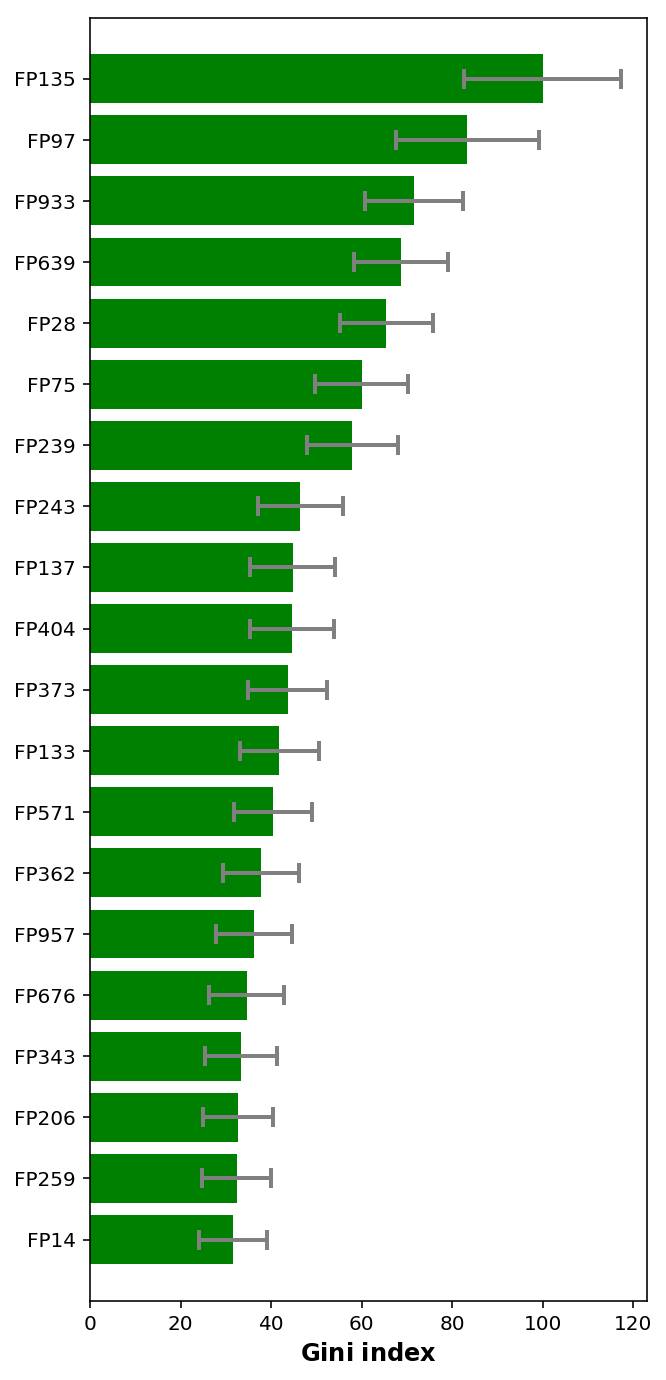



************************************************************************************

QSAR/ER_alpha_ExtendedFingerprinter.csv

from Remove useless descriptor
The initial set of 1024 descriptors has been reduced to 1003 descriptors.
from Remove correlation
The initial set of 1003 descriptors has been reduced to 951 descriptors.

Training set
------------
N: 861
R2: 0.9484
std_R2: 0.0030
RMSE: 0.4691
std_RMSE: 0.0039

Cross-validation set
------------
N: 861
Q2: 0.7055
std_Q2: 0.0078
RMSE: 0.7555
std_RMSE: 0.0050

External set
------------
N: 370
Q2_EXt: 0.7270
std_Q2_EXt: 0.0124
RMSE: 0.5576
std_RMSE: 0.0176


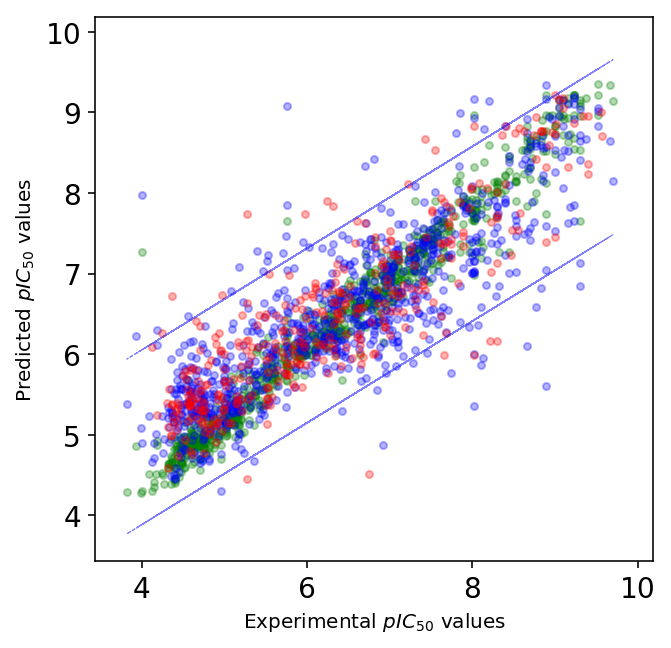

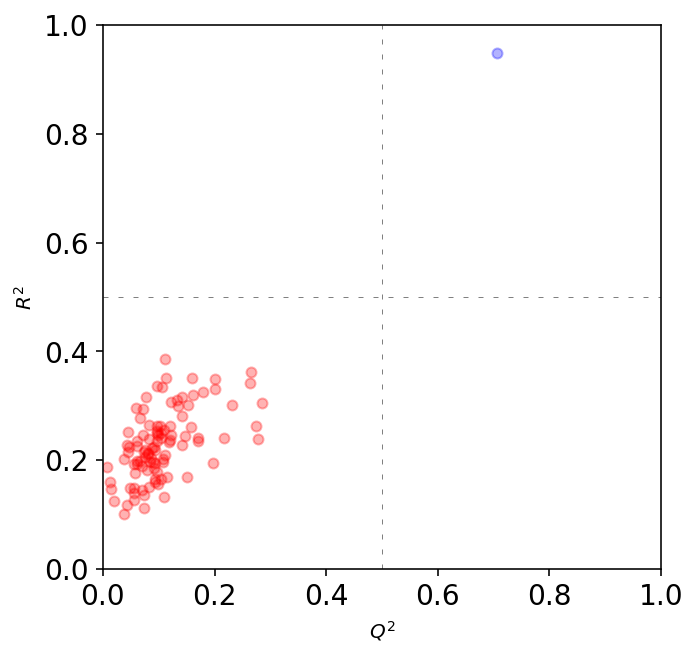

('top10', ['ExtFP286', 'ExtFP914', 'ExtFP315', 'ExtFP767', 'ExtFP343', 'ExtFP338', 'ExtFP106', 'ExtFP726', 'ExtFP111', 'ExtFP711'])

('top20', ['ExtFP286', 'ExtFP914', 'ExtFP315', 'ExtFP767', 'ExtFP343', 'ExtFP338', 'ExtFP106', 'ExtFP726', 'ExtFP111', 'ExtFP711', 'ExtFP868', 'ExtFP811', 'ExtFP212', 'ExtFP783', 'ExtFP840', 'ExtFP718', 'ExtFP242', 'ExtFP445', 'ExtFP423', 'ExtFP905'])

('top30', ['ExtFP286', 'ExtFP914', 'ExtFP315', 'ExtFP767', 'ExtFP343', 'ExtFP338', 'ExtFP106', 'ExtFP726', 'ExtFP111', 'ExtFP711', 'ExtFP868', 'ExtFP811', 'ExtFP212', 'ExtFP783', 'ExtFP840', 'ExtFP718', 'ExtFP242', 'ExtFP445', 'ExtFP423', 'ExtFP905', 'ExtFP467', 'ExtFP560', 'ExtFP959', 'ExtFP499', 'ExtFP176', 'ExtFP31', 'ExtFP30', 'ExtFP719', 'ExtFP915', 'ExtFP706'])

('top40', ['ExtFP286', 'ExtFP914', 'ExtFP315', 'ExtFP767', 'ExtFP343', 'ExtFP338', 'ExtFP106', 'ExtFP726', 'ExtFP111', 'ExtFP711', 'ExtFP868', 'ExtFP811', 'ExtFP212', 'ExtFP783', 'ExtFP840', 'ExtFP718', 'ExtFP242', 'ExtFP445', 'ExtFP423', 'Ext

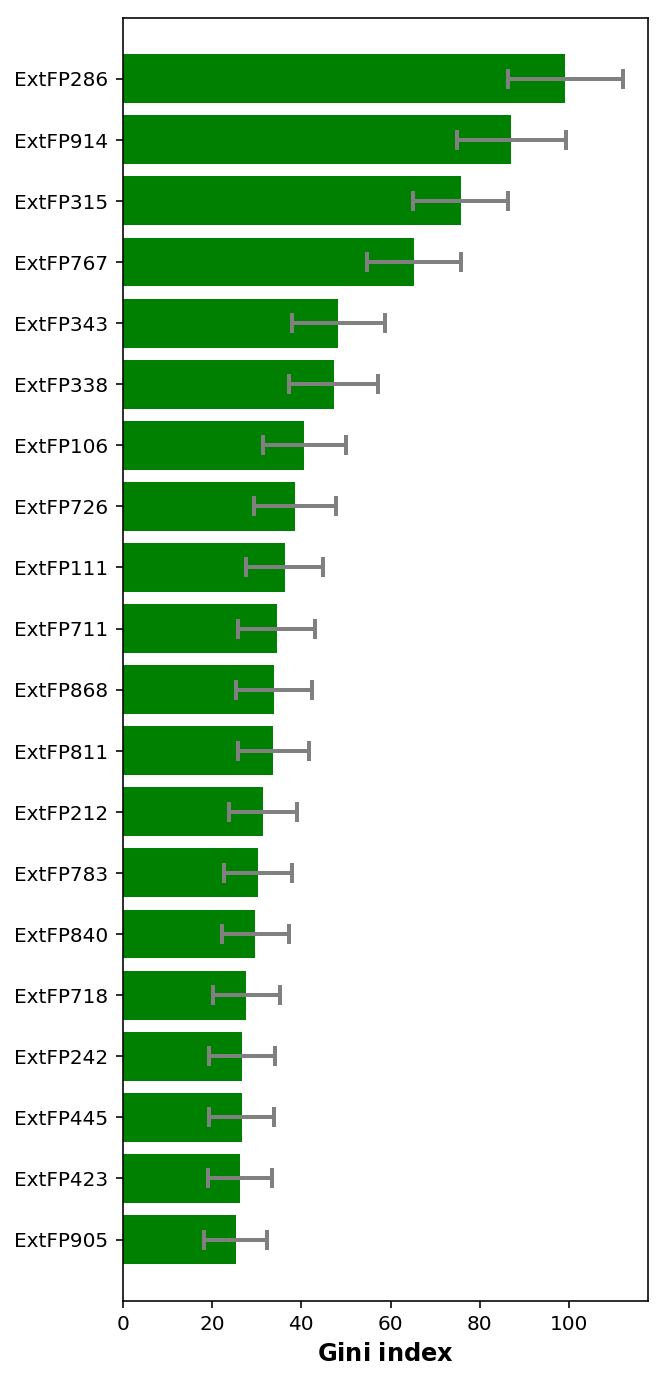



************************************************************************************

QSAR/ER_alpha_PubchemFingerprinter.csv

from Remove useless descriptor
The initial set of 881 descriptors has been reduced to 529 descriptors.
from Remove correlation
The initial set of 529 descriptors has been reduced to 196 descriptors.

Training set
------------
N: 861
R2: 0.9412
std_R2: 0.0037
RMSE: 0.4828
std_RMSE: 0.0046

Cross-validation set
------------
N: 861
Q2: 0.7120
std_Q2: 0.0089
RMSE: 0.7405
std_RMSE: 0.0048

External set
------------
N: 370
Q2_EXt: 0.7317
std_Q2_EXt: 0.0090
RMSE: 0.5379
std_RMSE: 0.0115


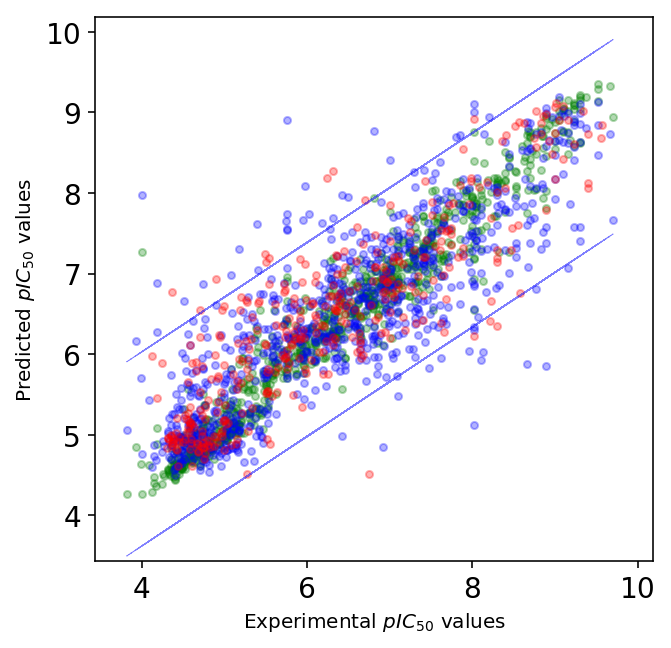

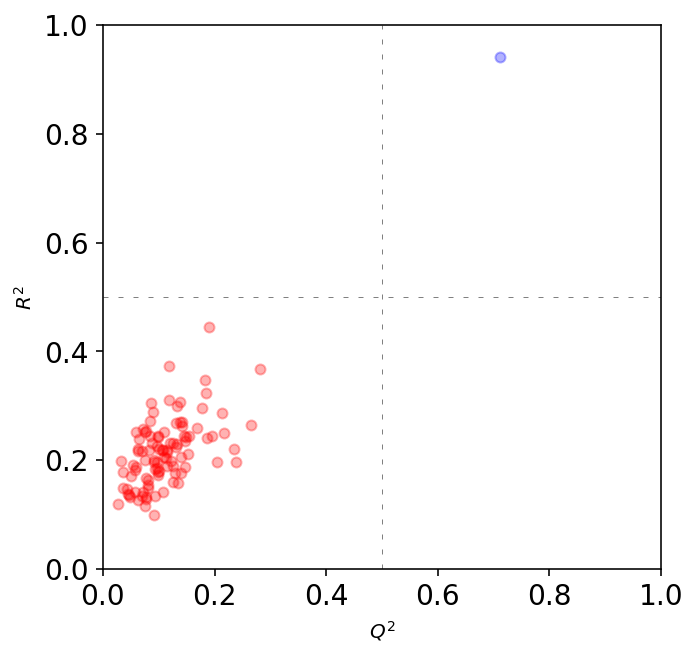

('top10', ['PubchemFP193', 'PubchemFP308', 'PubchemFP375', 'PubchemFP439', 'PubchemFP696', 'PubchemFP420', 'PubchemFP199', 'PubchemFP534', 'PubchemFP391', 'PubchemFP493'])

('top20', ['PubchemFP193', 'PubchemFP308', 'PubchemFP375', 'PubchemFP439', 'PubchemFP696', 'PubchemFP420', 'PubchemFP199', 'PubchemFP534', 'PubchemFP391', 'PubchemFP493', 'PubchemFP186', 'PubchemFP345', 'PubchemFP566', 'PubchemFP580', 'PubchemFP258', 'PubchemFP757', 'PubchemFP346', 'PubchemFP681', 'PubchemFP405', 'PubchemFP33'])

('top30', ['PubchemFP193', 'PubchemFP308', 'PubchemFP375', 'PubchemFP439', 'PubchemFP696', 'PubchemFP420', 'PubchemFP199', 'PubchemFP534', 'PubchemFP391', 'PubchemFP493', 'PubchemFP186', 'PubchemFP345', 'PubchemFP566', 'PubchemFP580', 'PubchemFP258', 'PubchemFP757', 'PubchemFP346', 'PubchemFP681', 'PubchemFP405', 'PubchemFP33', 'PubchemFP15', 'PubchemFP299', 'PubchemFP256', 'PubchemFP206', 'PubchemFP20', 'PubchemFP694', 'PubchemFP3', 'PubchemFP381', 'PubchemFP185', 'PubchemFP380'])

('top40

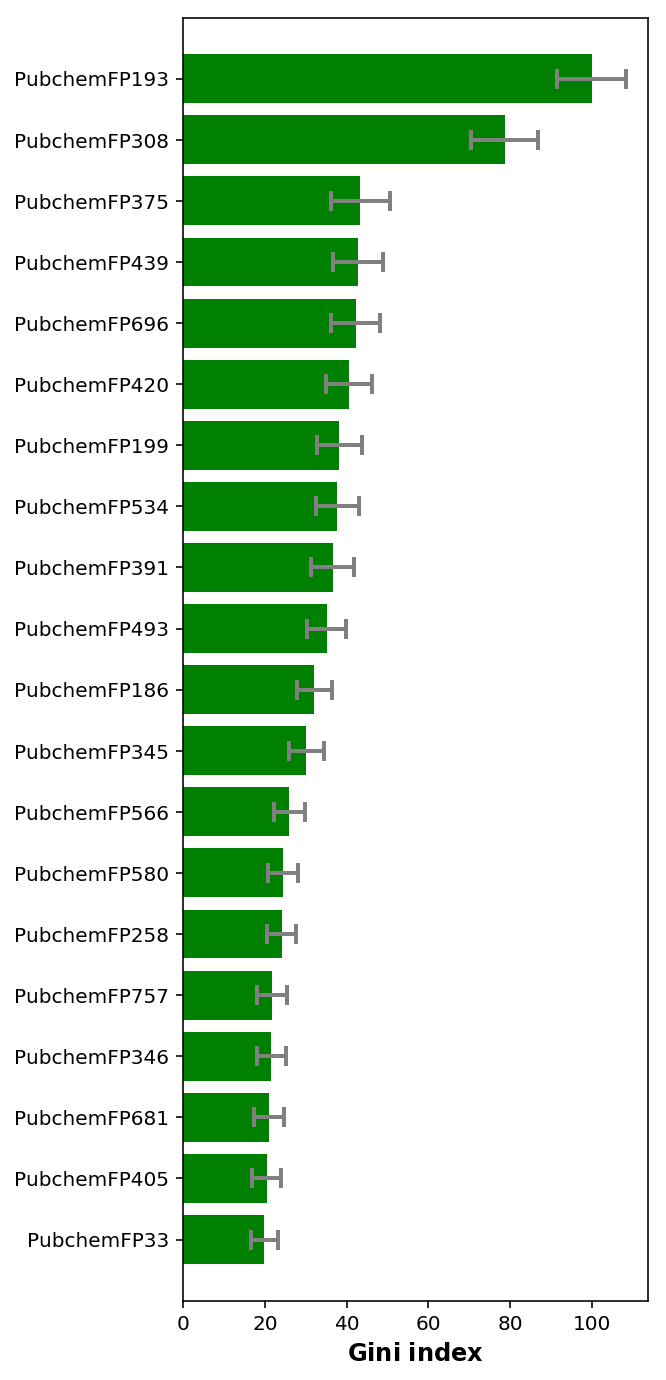



************************************************************************************

QSAR/ER_alpha_EStateFingerprinter.csv

from Remove useless descriptor
The initial set of 79 descriptors has been reduced to 33 descriptors.
from Remove correlation
The initial set of 33 descriptors has been reduced to 31 descriptors.

Training set
------------
N: 861
R2: 0.8806
std_R2: 0.0041
RMSE: 0.5796
std_RMSE: 0.0051

Cross-validation set
------------
N: 861
Q2: 0.6747
std_Q2: 0.0113
RMSE: 0.7653
std_RMSE: 0.0064

External set
------------
N: 370
Q2_EXt: 0.6916
std_Q2_EXt: 0.0199
RMSE: 0.5709
std_RMSE: 0.0190


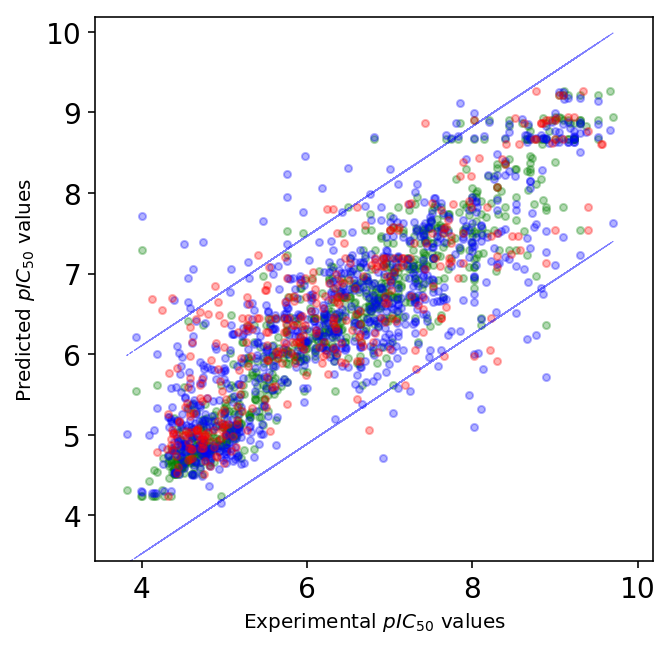

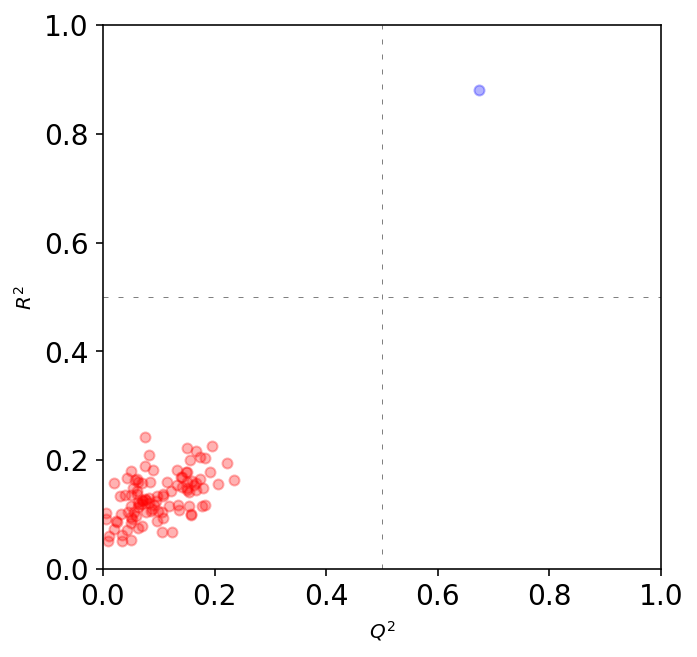

('top10', ['EStateFP34', 'EStateFP30', 'EStateFP29', 'EStateFP35', 'EStateFP36', 'EStateFP24', 'EStateFP37', 'EStateFP50', 'EStateFP16', 'EStateFP13'])

('top20', ['EStateFP34', 'EStateFP30', 'EStateFP29', 'EStateFP35', 'EStateFP36', 'EStateFP24', 'EStateFP37', 'EStateFP50', 'EStateFP16', 'EStateFP13', 'EStateFP51', 'EStateFP18', 'EStateFP9', 'EStateFP7', 'EStateFP32', 'EStateFP25', 'EStateFP19', 'EStateFP38', 'EStateFP11', 'EStateFP54'])

('top30', ['EStateFP34', 'EStateFP30', 'EStateFP29', 'EStateFP35', 'EStateFP36', 'EStateFP24', 'EStateFP37', 'EStateFP50', 'EStateFP16', 'EStateFP13', 'EStateFP51', 'EStateFP18', 'EStateFP9', 'EStateFP7', 'EStateFP32', 'EStateFP25', 'EStateFP19', 'EStateFP38', 'EStateFP11', 'EStateFP54', 'EStateFP53', 'EStateFP15', 'EStateFP28', 'EStateFP70', 'EStateFP49', 'EStateFP21', 'EStateFP12', 'EStateFP8', 'EStateFP31', 'EStateFP10'])

('top40', ['EStateFP34', 'EStateFP30', 'EStateFP29', 'EStateFP35', 'EStateFP36', 'EStateFP24', 'EStateFP37', 'EStateFP50', 'ES

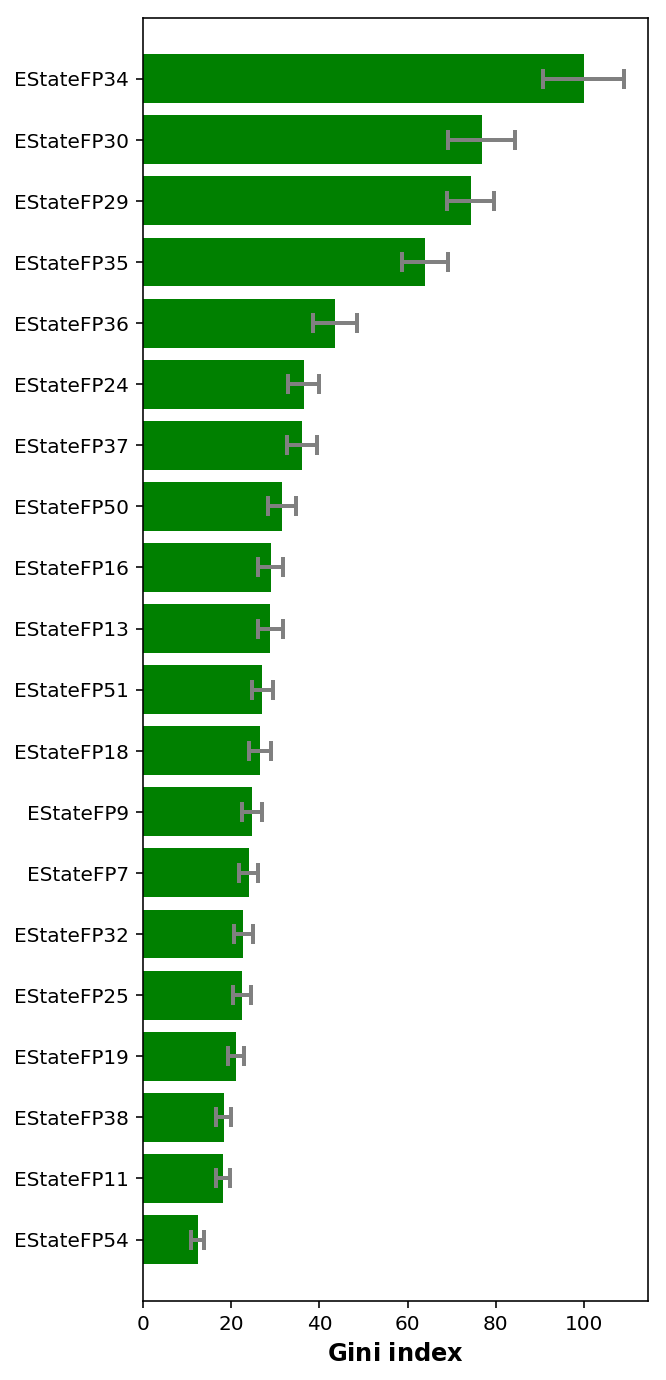



************************************************************************************

QSAR/ER_alpha_AtomPairs2DFingerprintCount.csv

from Remove useless descriptor
The initial set of 780 descriptors has been reduced to 216 descriptors.
from Remove correlation
The initial set of 216 descriptors has been reduced to 120 descriptors.

Training set
------------
N: 861
R2: 0.9433
std_R2: 0.0023
RMSE: 0.4866
std_RMSE: 0.0043

Cross-validation set
------------
N: 861
Q2: 0.6886
std_Q2: 0.0091
RMSE: 0.7597
std_RMSE: 0.0068

External set
------------
N: 370
Q2_EXt: 0.7076
std_Q2_EXt: 0.0146
RMSE: 0.5659
std_RMSE: 0.0148


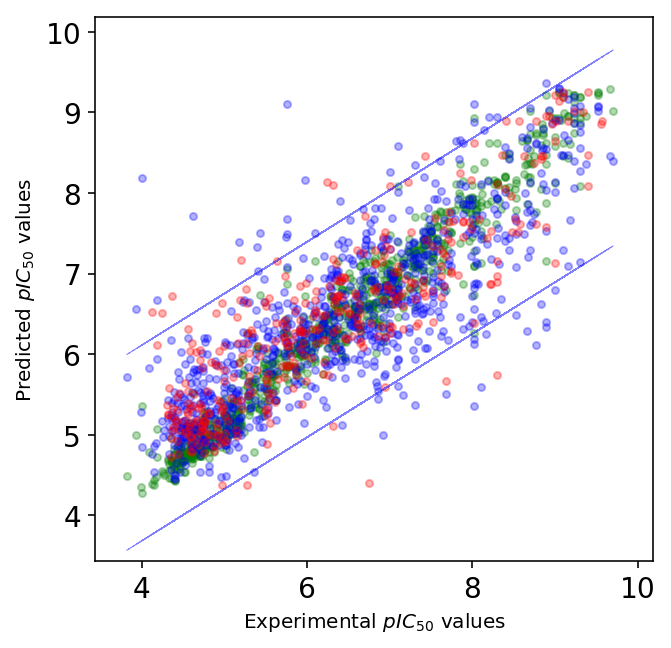

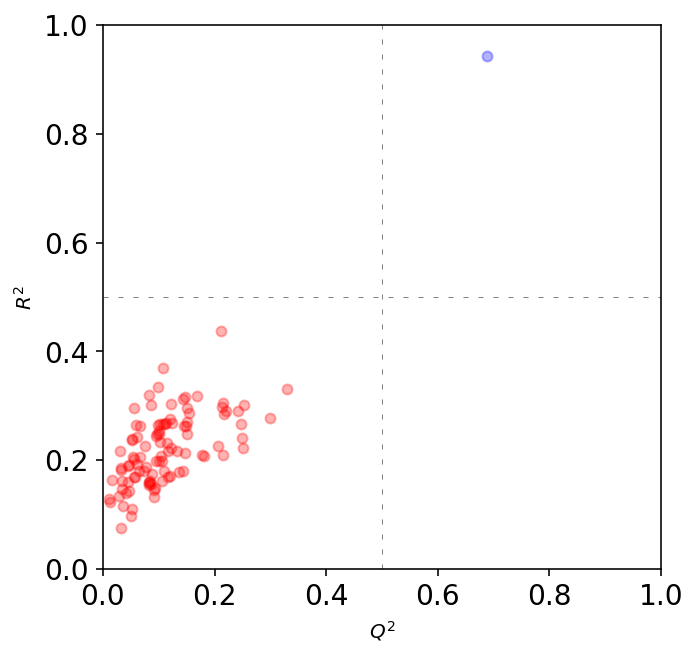

('top10', ['APC2D1_C_C', 'APC2D2_N_O', 'APC2D10_O_O', 'APC2D1_C_N', 'APC2D1_C_O', 'APC2D4_N_O', 'APC2D2_N_N', 'APC2D3_N_O', 'APC2D7_O_O', 'APC2D9_N_O'])

('top20', ['APC2D1_C_C', 'APC2D2_N_O', 'APC2D10_O_O', 'APC2D1_C_N', 'APC2D1_C_O', 'APC2D4_N_O', 'APC2D2_N_N', 'APC2D3_N_O', 'APC2D7_O_O', 'APC2D9_N_O', 'APC2D6_O_S', 'APC2D3_O_O', 'APC2D5_N_O', 'APC2D7_N_O', 'APC2D5_O_O', 'APC2D10_N_S', 'APC2D6_O_O', 'APC2D1_C_S', 'APC2D4_O_O', 'APC2D2_N_S'])

('top30', ['APC2D1_C_C', 'APC2D2_N_O', 'APC2D10_O_O', 'APC2D1_C_N', 'APC2D1_C_O', 'APC2D4_N_O', 'APC2D2_N_N', 'APC2D3_N_O', 'APC2D7_O_O', 'APC2D9_N_O', 'APC2D6_O_S', 'APC2D3_O_O', 'APC2D5_N_O', 'APC2D7_N_O', 'APC2D5_O_O', 'APC2D10_N_S', 'APC2D6_O_O', 'APC2D1_C_S', 'APC2D4_O_O', 'APC2D2_N_S', 'APC2D9_O_O', 'APC2D4_N_N', 'APC2D6_N_O', 'APC2D8_O_O', 'APC2D6_N_N', 'APC2D7_O_S', 'APC2D3_N_N', 'APC2D10_C_S', 'APC2D1_C_F', 'APC2D3_O_S'])

('top40', ['APC2D1_C_C', 'APC2D2_N_O', 'APC2D10_O_O', 'APC2D1_C_N', 'APC2D1_C_O', 'APC2D4_N_O', 'APC2D2_N_N', 'APC2

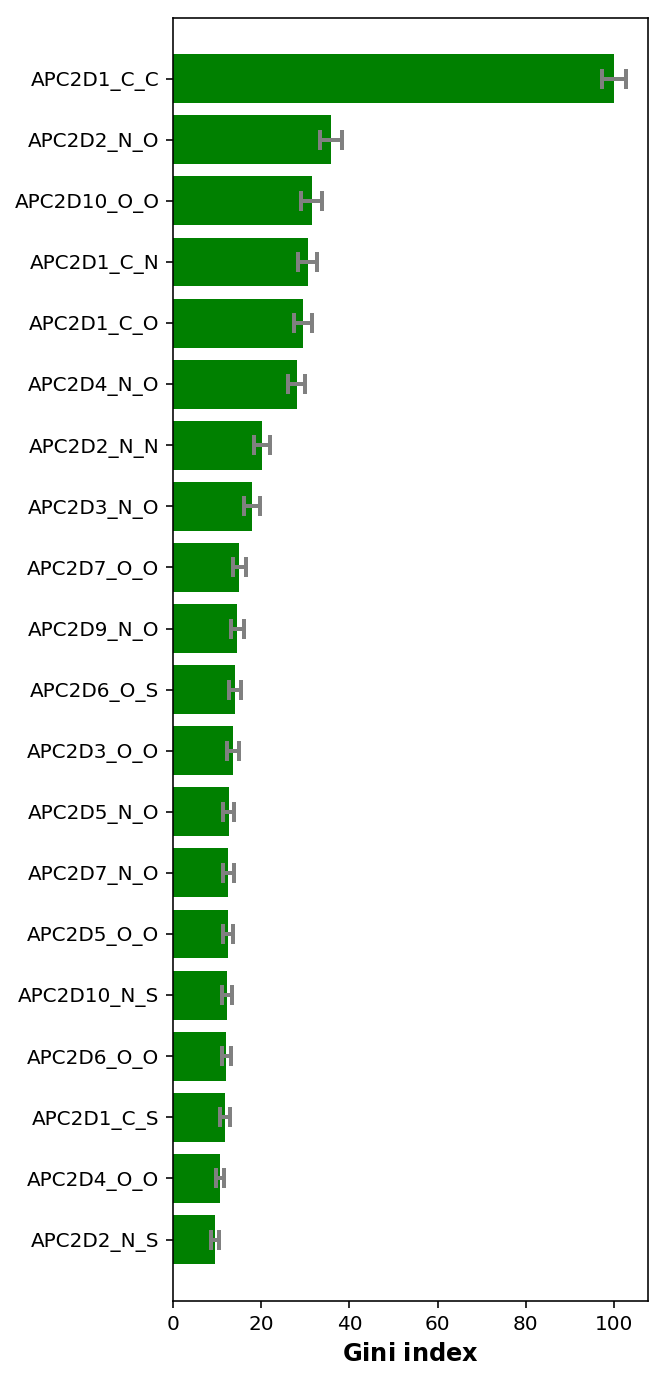



************************************************************************************

QSAR/ER_alpha_KlekotaRothFingerprintCount.csv

from Remove useless descriptor
The initial set of 4860 descriptors has been reduced to 786 descriptors.
from Remove correlation
The initial set of 786 descriptors has been reduced to 405 descriptors.

Training set
------------
N: 861
R2: 0.9617
std_R2: 0.0014
RMSE: 0.4446
std_RMSE: 0.0035

Cross-validation set
------------
N: 861
Q2: 0.7259
std_Q2: 0.0078
RMSE: 0.7339
std_RMSE: 0.0056

External set
------------
N: 370
Q2_EXt: 0.7380
std_Q2_EXt: 0.0199
RMSE: 0.5274
std_RMSE: 0.0213


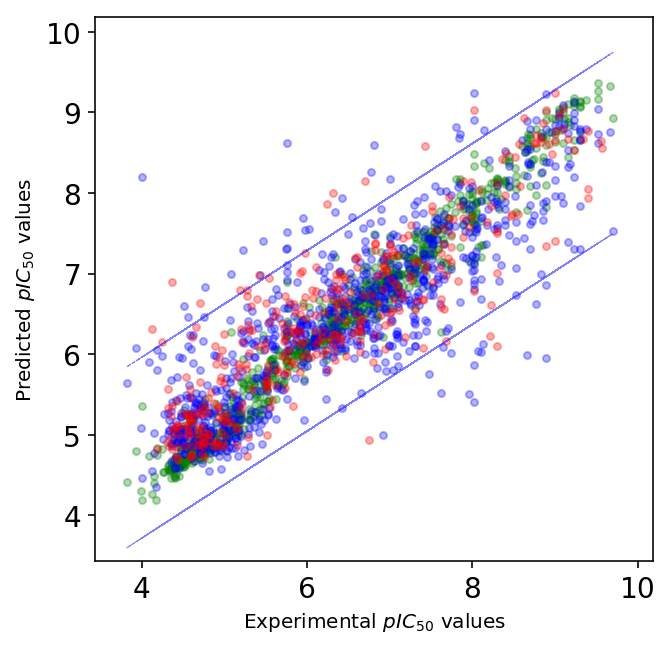

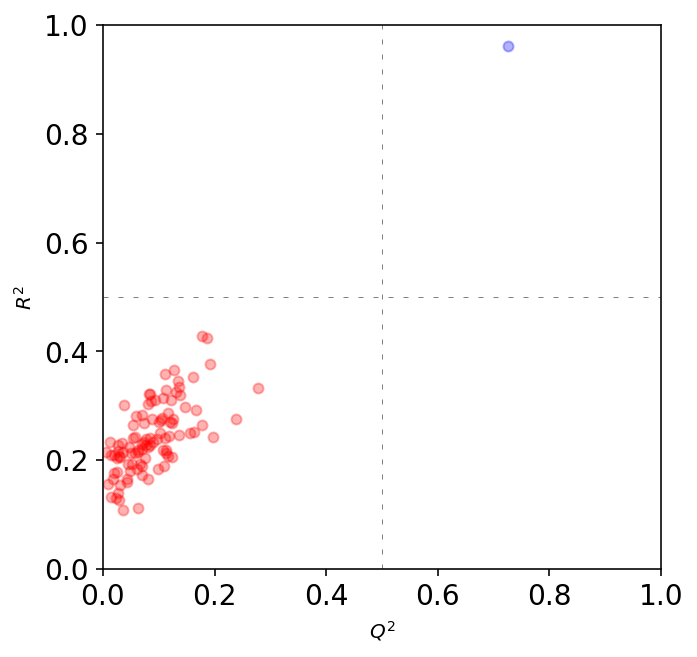

('top10', ['KRFPC1148', 'KRFPC1642', 'KRFPC297', 'KRFPC2711', 'KRFPC1193', 'KRFPC45', 'KRFPC3560', 'KRFPC444', 'KRFPC1645', 'KRFPC433'])

('top20', ['KRFPC1148', 'KRFPC1642', 'KRFPC297', 'KRFPC2711', 'KRFPC1193', 'KRFPC45', 'KRFPC3560', 'KRFPC444', 'KRFPC1645', 'KRFPC433', 'KRFPC2981', 'KRFPC4331', 'KRFPC1', 'KRFPC677', 'KRFPC2262', 'KRFPC2547', 'KRFPC2856', 'KRFPC669', 'KRFPC2979', 'KRFPC2548'])

('top30', ['KRFPC1148', 'KRFPC1642', 'KRFPC297', 'KRFPC2711', 'KRFPC1193', 'KRFPC45', 'KRFPC3560', 'KRFPC444', 'KRFPC1645', 'KRFPC433', 'KRFPC2981', 'KRFPC4331', 'KRFPC1', 'KRFPC677', 'KRFPC2262', 'KRFPC2547', 'KRFPC2856', 'KRFPC669', 'KRFPC2979', 'KRFPC2548', 'KRFPC2265', 'KRFPC3729', 'KRFPC2438', 'KRFPC2667', 'KRFPC2855', 'KRFPC2242', 'KRFPC3602', 'KRFPC2986', 'KRFPC2712', 'KRFPC4813'])

('top40', ['KRFPC1148', 'KRFPC1642', 'KRFPC297', 'KRFPC2711', 'KRFPC1193', 'KRFPC45', 'KRFPC3560', 'KRFPC444', 'KRFPC1645', 'KRFPC433', 'KRFPC2981', 'KRFPC4331', 'KRFPC1', 'KRFPC677', 'KRFPC2262', 'KRFPC254

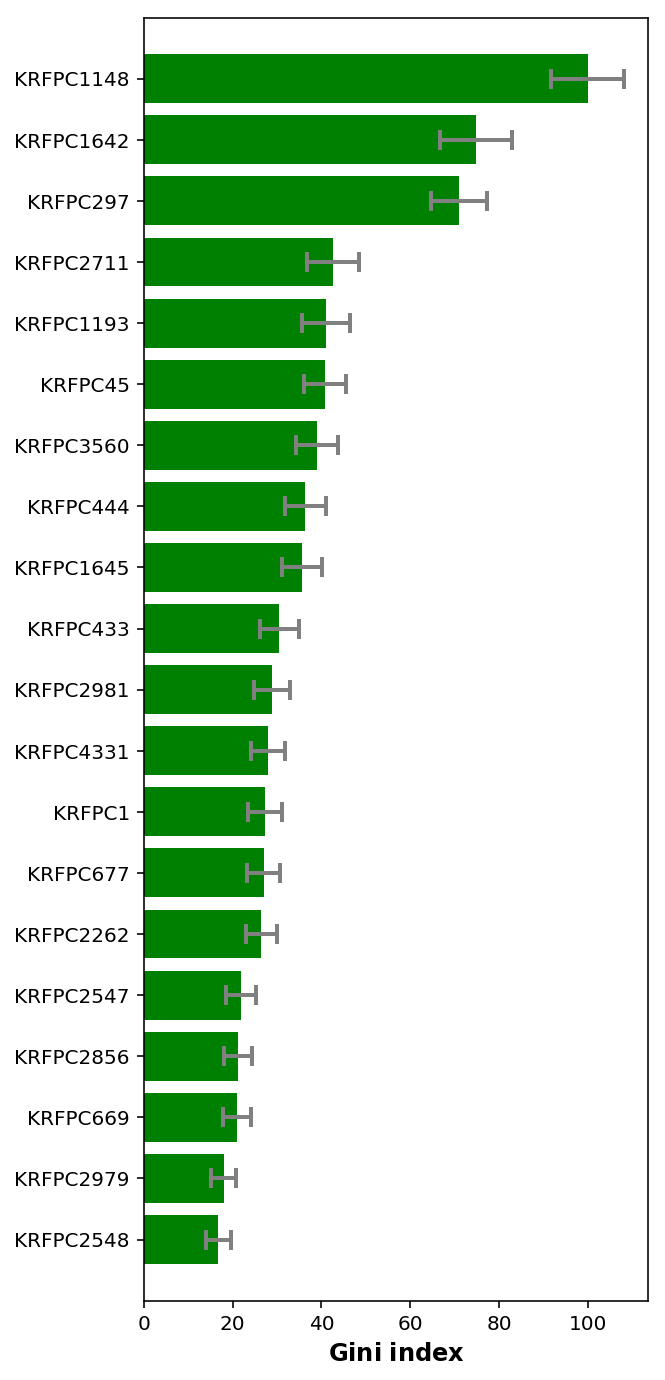



************************************************************************************

QSAR/ER_alpha_AtomPairs2DFingerprinter.csv

from Remove useless descriptor
The initial set of 780 descriptors has been reduced to 247 descriptors.
from Remove correlation
The initial set of 247 descriptors has been reduced to 154 descriptors.

Training set
------------
N: 861
R2: 0.8997
std_R2: 0.0065
RMSE: 0.5491
std_RMSE: 0.0067

Cross-validation set
------------
N: 861
Q2: 0.6702
std_Q2: 0.0059
RMSE: 0.7765
std_RMSE: 0.0057

External set
------------
N: 370
Q2_EXt: 0.6864
std_Q2_EXt: 0.0081
RMSE: 0.5954
std_RMSE: 0.0131


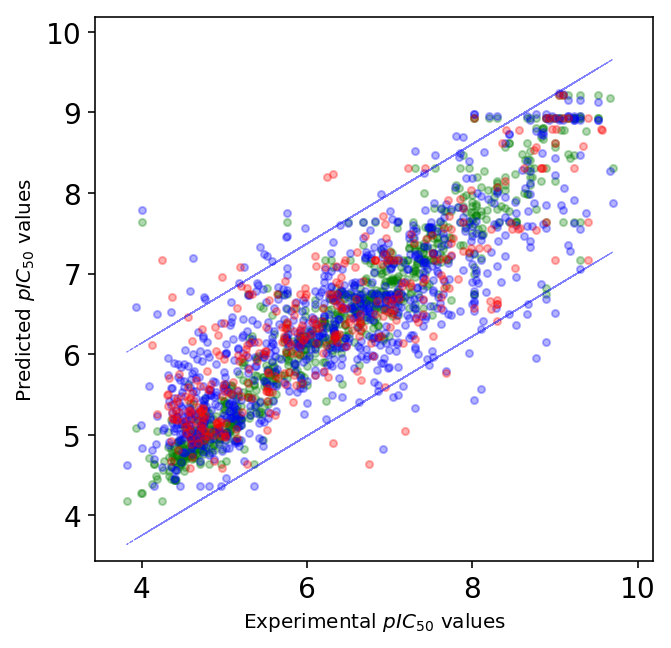

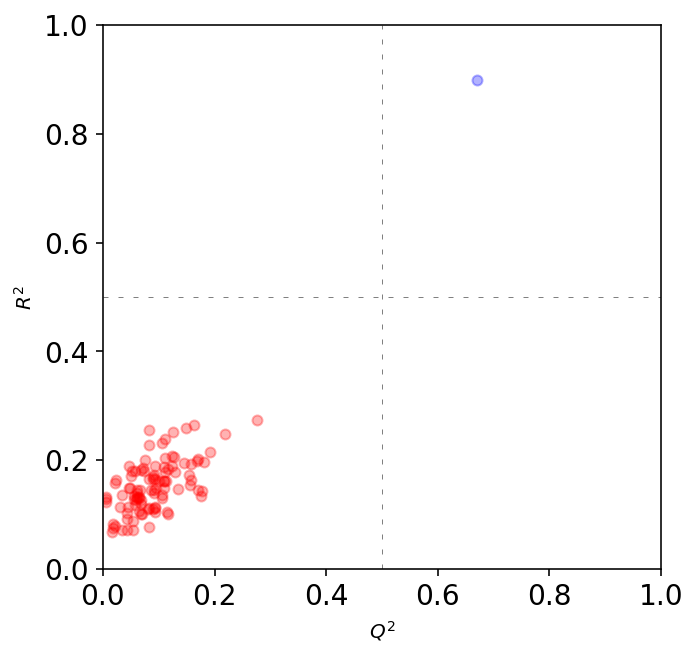

('top10', ['AD2D92', 'AD2D726', 'AD2D248', 'AD2D91', 'AD2D170', 'AD2D102', 'AD2D638', 'AD2D180', 'AD2D415', 'AD2D717'])

('top20', ['AD2D92', 'AD2D726', 'AD2D248', 'AD2D91', 'AD2D170', 'AD2D102', 'AD2D638', 'AD2D180', 'AD2D415', 'AD2D717', 'AD2D482', 'AD2D492', 'AD2D414', 'AD2D326', 'AD2D258', 'AD2D648', 'AD2D703', 'AD2D93', 'AD2D336', 'AD2D247'])

('top30', ['AD2D92', 'AD2D726', 'AD2D248', 'AD2D91', 'AD2D170', 'AD2D102', 'AD2D638', 'AD2D180', 'AD2D415', 'AD2D717', 'AD2D482', 'AD2D492', 'AD2D414', 'AD2D326', 'AD2D258', 'AD2D648', 'AD2D703', 'AD2D93', 'AD2D336', 'AD2D247', 'AD2D570', 'AD2D404', 'AD2D4', 'AD2D403', 'AD2D169', 'AD2D625', 'AD2D493', 'AD2D637', 'AD2D2', 'AD2D560'])

('top40', ['AD2D92', 'AD2D726', 'AD2D248', 'AD2D91', 'AD2D170', 'AD2D102', 'AD2D638', 'AD2D180', 'AD2D415', 'AD2D717', 'AD2D482', 'AD2D492', 'AD2D414', 'AD2D326', 'AD2D258', 'AD2D648', 'AD2D703', 'AD2D93', 'AD2D336', 'AD2D247', 'AD2D570', 'AD2D404', 'AD2D4', 'AD2D403', 'AD2D169', 'AD2D625', 'AD2D493', 'AD2D637',

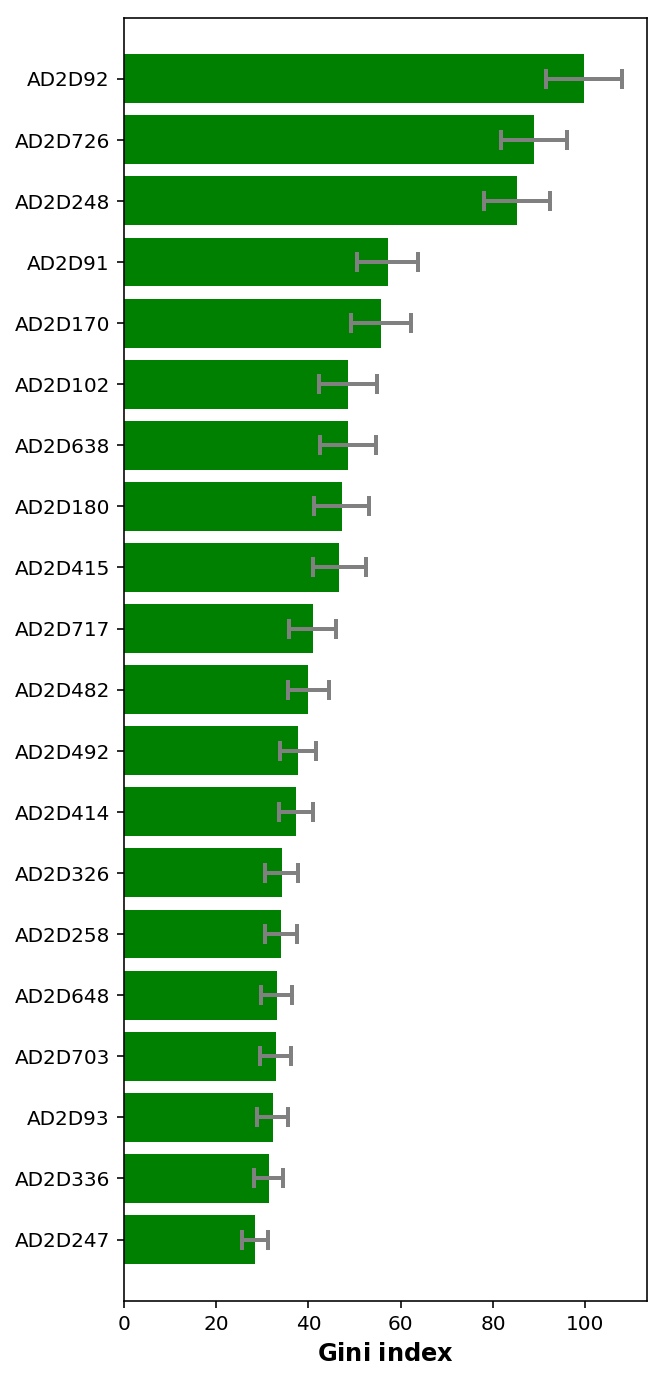



************************************************************************************

QSAR/ER_alpha_MACCSFingerprinter.csv

from Remove useless descriptor
The initial set of 166 descriptors has been reduced to 141 descriptors.
from Remove correlation
The initial set of 141 descriptors has been reduced to 92 descriptors.

Training set
------------
N: 861
R2: 0.9407
std_R2: 0.0027
RMSE: 0.4824
std_RMSE: 0.0052

Cross-validation set
------------
N: 861
Q2: 0.7244
std_Q2: 0.0090
RMSE: 0.7343
std_RMSE: 0.0051

External set
------------
N: 370
Q2_EXt: 0.7385
std_Q2_EXt: 0.0106
RMSE: 0.5316
std_RMSE: 0.0141


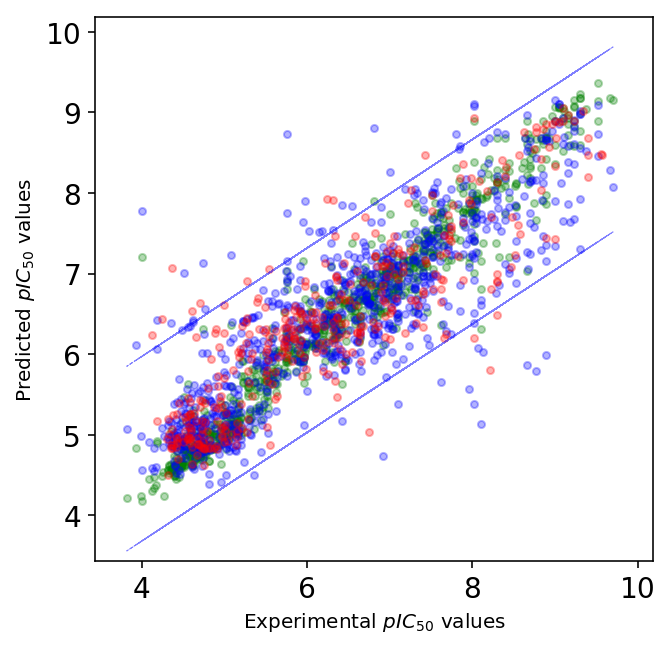

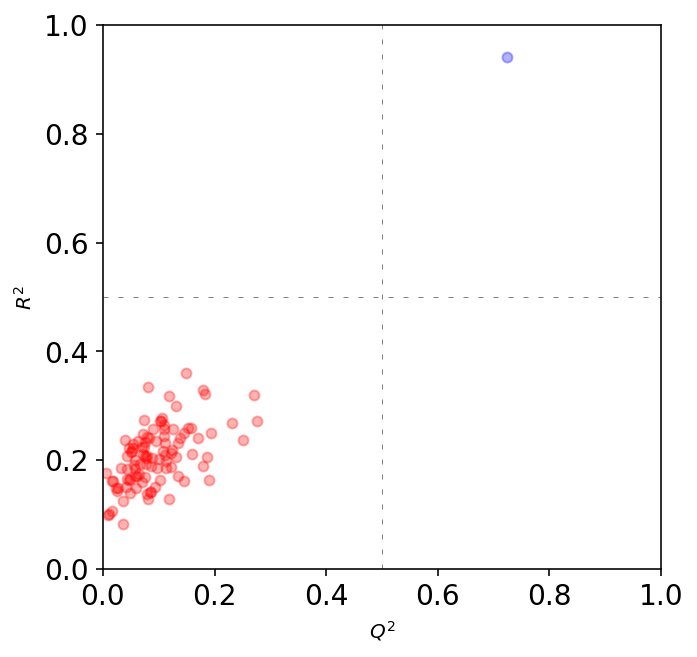

('top10', ['MACCSFP86', 'MACCSFP139', 'MACCSFP92', 'MACCSFP97', 'MACCSFP36', 'MACCSFP77', 'MACCSFP154', 'MACCSFP118', 'MACCSFP131', 'MACCSFP113'])

('top20', ['MACCSFP86', 'MACCSFP139', 'MACCSFP92', 'MACCSFP97', 'MACCSFP36', 'MACCSFP77', 'MACCSFP154', 'MACCSFP118', 'MACCSFP131', 'MACCSFP113', 'MACCSFP75', 'MACCSFP109', 'MACCSFP80', 'MACCSFP133', 'MACCSFP136', 'MACCSFP95', 'MACCSFP127', 'MACCSFP98', 'MACCSFP72', 'MACCSFP62'])

('top30', ['MACCSFP86', 'MACCSFP139', 'MACCSFP92', 'MACCSFP97', 'MACCSFP36', 'MACCSFP77', 'MACCSFP154', 'MACCSFP118', 'MACCSFP131', 'MACCSFP113', 'MACCSFP75', 'MACCSFP109', 'MACCSFP80', 'MACCSFP133', 'MACCSFP136', 'MACCSFP95', 'MACCSFP127', 'MACCSFP98', 'MACCSFP72', 'MACCSFP62', 'MACCSFP142', 'MACCSFP57', 'MACCSFP155', 'MACCSFP140', 'MACCSFP144', 'MACCSFP151', 'MACCSFP93', 'MACCSFP65', 'MACCSFP50', 'MACCSFP132'])

('top40', ['MACCSFP86', 'MACCSFP139', 'MACCSFP92', 'MACCSFP97', 'MACCSFP36', 'MACCSFP77', 'MACCSFP154', 'MACCSFP118', 'MACCSFP131', 'MACCSFP113', 'MACCS

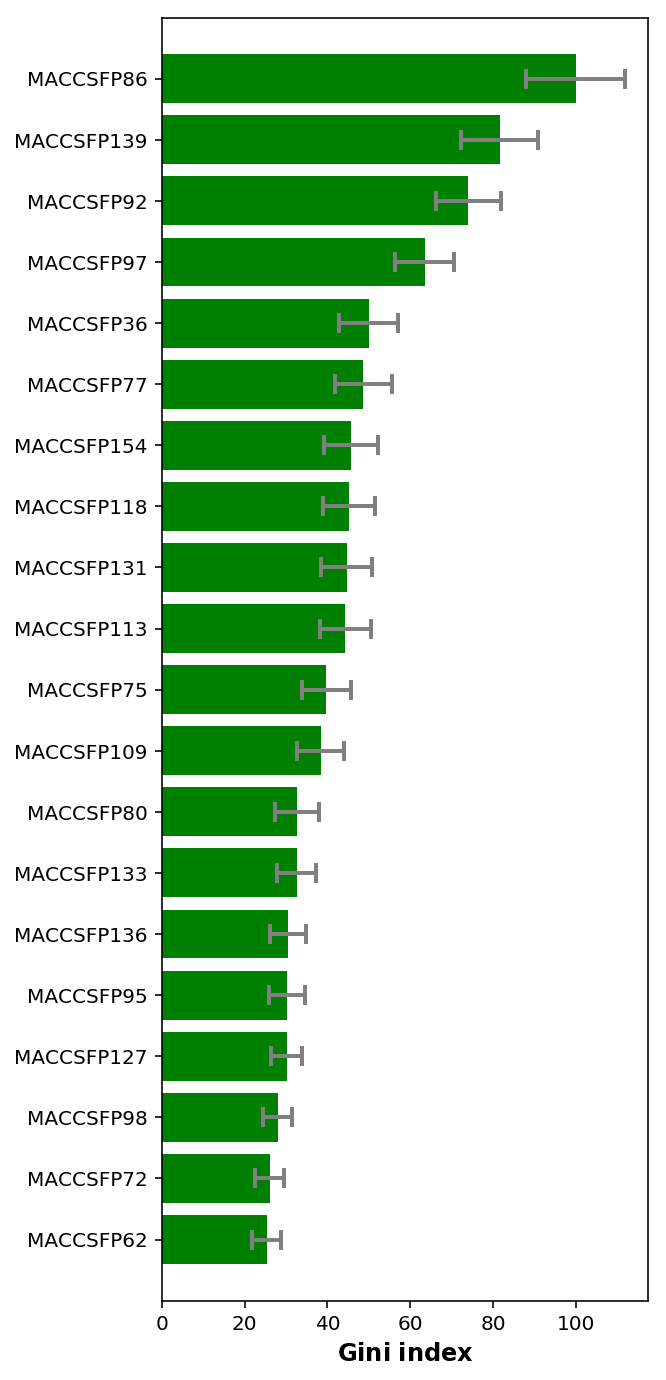



************************************************************************************

QSAR/ER_alpha_SubstructureFingerprintCount.csv

from Remove useless descriptor
The initial set of 307 descriptors has been reduced to 82 descriptors.
from Remove correlation
The initial set of 82 descriptors has been reduced to 64 descriptors.

Training set
------------
N: 861
R2: 0.9479
std_R2: 0.0019
RMSE: 0.4734
std_RMSE: 0.0044

Cross-validation set
------------
N: 861
Q2: 0.7191
std_Q2: 0.0101
RMSE: 0.7338
std_RMSE: 0.0068

External set
------------
N: 370
Q2_EXt: 0.7340
std_Q2_EXt: 0.0166
RMSE: 0.5255
std_RMSE: 0.0159


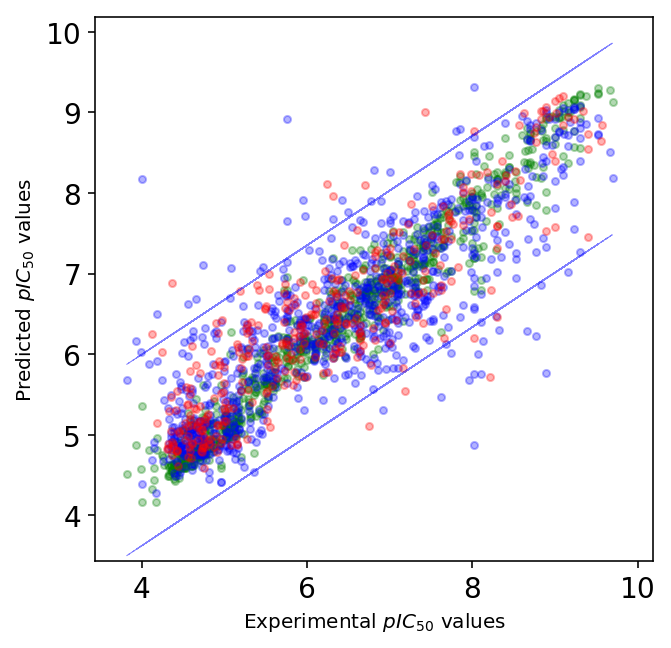

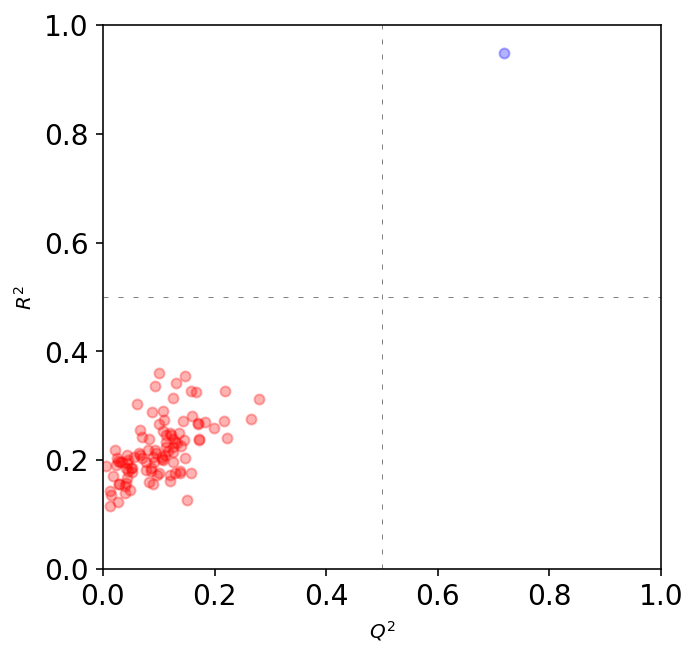

('top10', ['SubFPC169', 'SubFPC23', 'SubFPC274', 'SubFPC302', 'SubFPC88', 'SubFPC2', 'SubFPC181', 'SubFPC18', 'SubFPC287', 'SubFPC137'])

('top20', ['SubFPC169', 'SubFPC23', 'SubFPC274', 'SubFPC302', 'SubFPC88', 'SubFPC2', 'SubFPC181', 'SubFPC18', 'SubFPC287', 'SubFPC137', 'SubFPC1', 'SubFPC20', 'SubFPC5', 'SubFPC135', 'SubFPC100', 'SubFPC182', 'SubFPC172', 'SubFPC3', 'SubFPC183', 'SubFPC49'])

('top30', ['SubFPC169', 'SubFPC23', 'SubFPC274', 'SubFPC302', 'SubFPC88', 'SubFPC2', 'SubFPC181', 'SubFPC18', 'SubFPC287', 'SubFPC137', 'SubFPC1', 'SubFPC20', 'SubFPC5', 'SubFPC135', 'SubFPC100', 'SubFPC182', 'SubFPC172', 'SubFPC3', 'SubFPC183', 'SubFPC49', 'SubFPC33', 'SubFPC4', 'SubFPC180', 'SubFPC303', 'SubFPC171', 'SubFPC85', 'SubFPC101', 'SubFPC12', 'SubFPC179', 'SubFPC143'])

('top40', ['SubFPC169', 'SubFPC23', 'SubFPC274', 'SubFPC302', 'SubFPC88', 'SubFPC2', 'SubFPC181', 'SubFPC18', 'SubFPC287', 'SubFPC137', 'SubFPC1', 'SubFPC20', 'SubFPC5', 'SubFPC135', 'SubFPC100', 'SubFPC182', 'SubFPC1

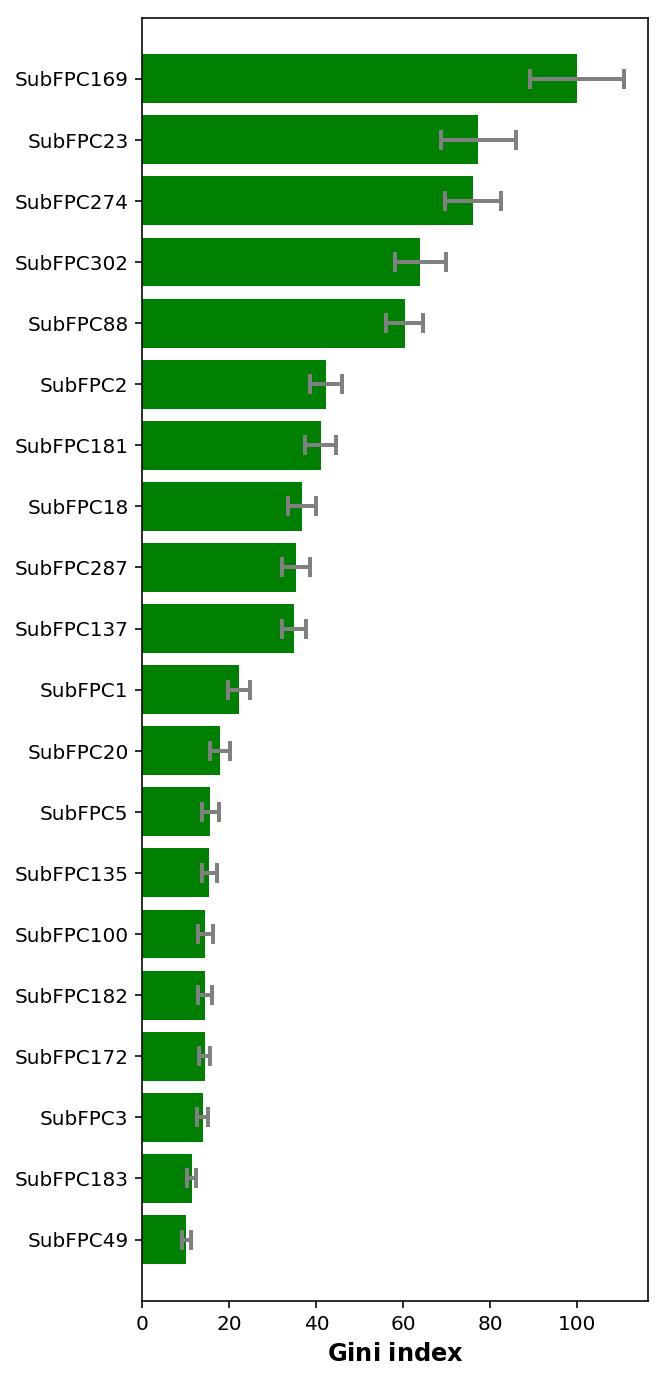



************************************************************************************

QSAR/ER_alpha_KlekotaRothFingerprinter.csv

from Remove useless descriptor
The initial set of 4860 descriptors has been reduced to 844 descriptors.
from Remove correlation
The initial set of 844 descriptors has been reduced to 452 descriptors.

Training set
------------
N: 861
R2: 0.9518
std_R2: 0.0027
RMSE: 0.4623
std_RMSE: 0.0041

Cross-validation set
------------
N: 861
Q2: 0.7119
std_Q2: 0.0074
RMSE: 0.7459
std_RMSE: 0.0060

External set
------------
N: 370
Q2_EXt: 0.7289
std_Q2_EXt: 0.0137
RMSE: 0.5423
std_RMSE: 0.0164


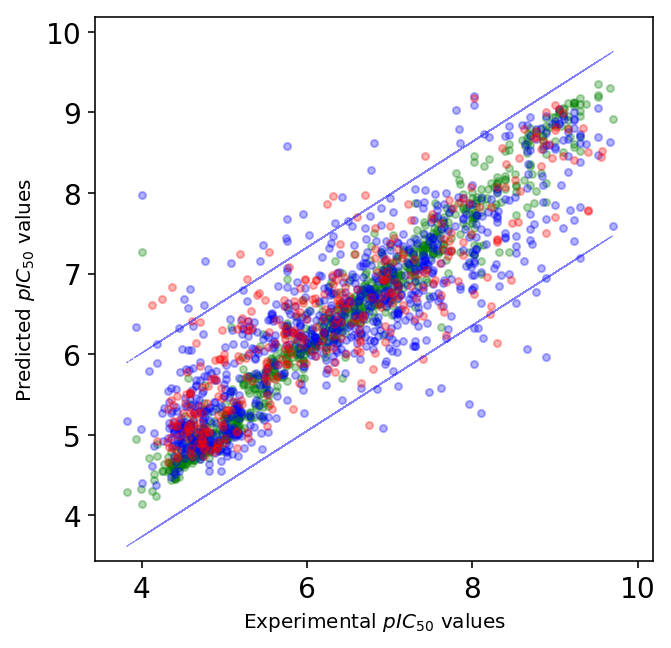

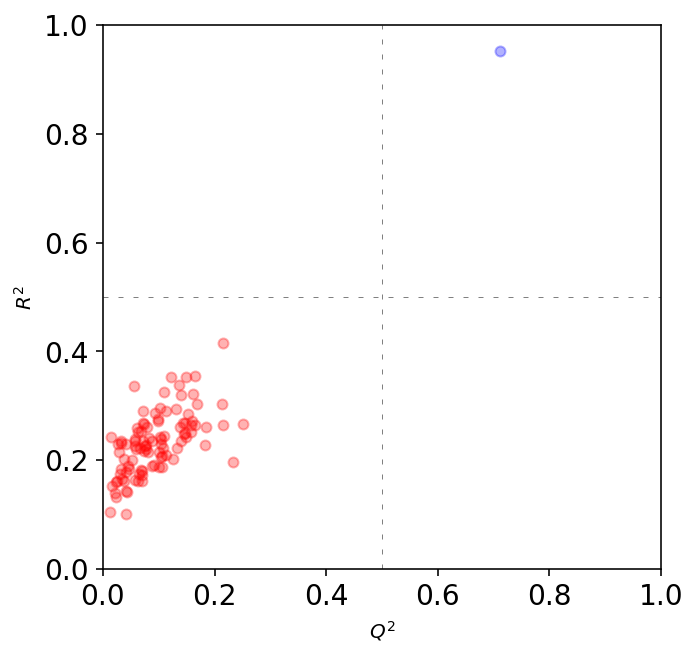

('top10', ['KRFP1148', 'KRFP1642', 'KRFP3560', 'KRFP1193', 'KRFP433', 'KRFP4736', 'KRFP341', 'KRFP1645', 'KRFP677', 'KRFP2981'])

('top20', ['KRFP1148', 'KRFP1642', 'KRFP3560', 'KRFP1193', 'KRFP433', 'KRFP4736', 'KRFP341', 'KRFP1645', 'KRFP677', 'KRFP2981', 'KRFP2242', 'KRFP4820', 'KRFP45', 'KRFP2856', 'KRFP2', 'KRFP2979', 'KRFP3681', 'KRFP344', 'KRFP2855', 'KRFP3788'])

('top30', ['KRFP1148', 'KRFP1642', 'KRFP3560', 'KRFP1193', 'KRFP433', 'KRFP4736', 'KRFP341', 'KRFP1645', 'KRFP677', 'KRFP2981', 'KRFP2242', 'KRFP4820', 'KRFP45', 'KRFP2856', 'KRFP2', 'KRFP2979', 'KRFP3681', 'KRFP344', 'KRFP2855', 'KRFP3788', 'KRFP1452', 'KRFP2667', 'KRFP3682', 'KRFP2547', 'KRFP2712', 'KRFP2265', 'KRFP2548', 'KRFP3602', 'KRFP2986', 'KRFP4287'])

('top40', ['KRFP1148', 'KRFP1642', 'KRFP3560', 'KRFP1193', 'KRFP433', 'KRFP4736', 'KRFP341', 'KRFP1645', 'KRFP677', 'KRFP2981', 'KRFP2242', 'KRFP4820', 'KRFP45', 'KRFP2856', 'KRFP2', 'KRFP2979', 'KRFP3681', 'KRFP344', 'KRFP2855', 'KRFP3788', 'KRFP1452', 'KRFP266

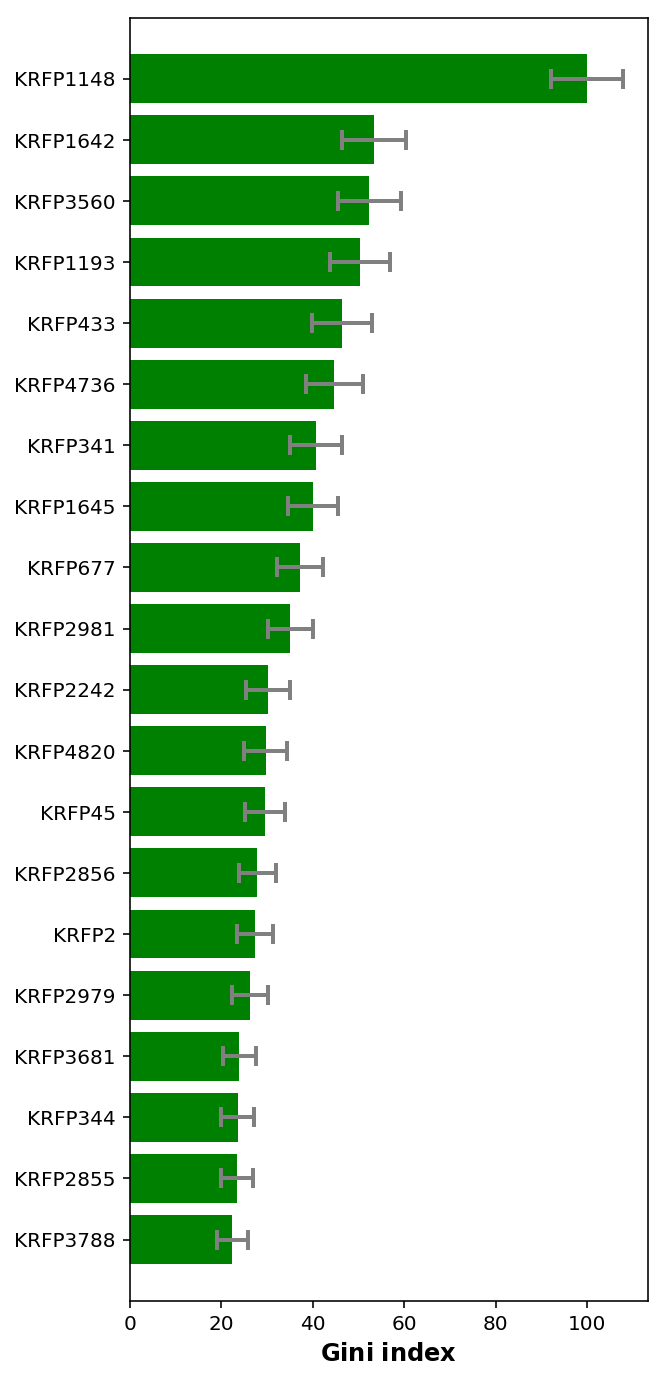



************************************************************************************

QSAR/ER_alpha_SubstructureFingerprinter.csv

from Remove useless descriptor
The initial set of 307 descriptors has been reduced to 80 descriptors.
from Remove correlation
The initial set of 80 descriptors has been reduced to 66 descriptors.

Training set
------------
N: 861
R2: 0.9042
std_R2: 0.0043
RMSE: 0.5480
std_RMSE: 0.0064

Cross-validation set
------------
N: 861
Q2: 0.7009
std_Q2: 0.0110
RMSE: 0.7507
std_RMSE: 0.0083

External set
------------
N: 370
Q2_EXt: 0.7115
std_Q2_EXt: 0.0194
RMSE: 0.5539
std_RMSE: 0.0214


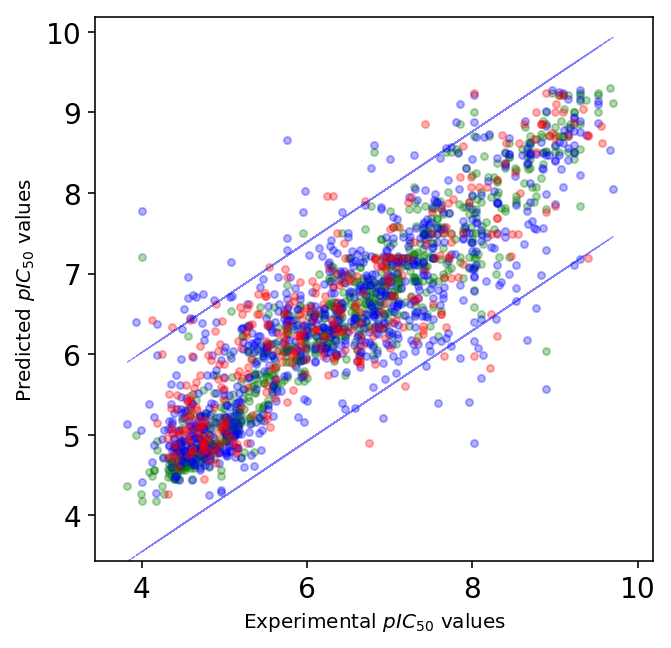

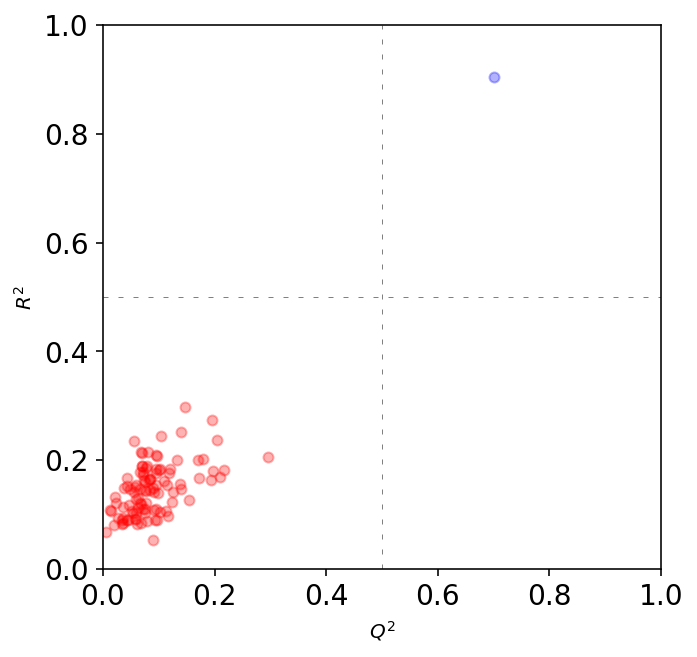

('top10', ['SubFP169', 'SubFP23', 'SubFP88', 'SubFP18', 'SubFP181', 'SubFP137', 'SubFP20', 'SubFP2', 'SubFP184', 'SubFP1'])

('top20', ['SubFP169', 'SubFP23', 'SubFP88', 'SubFP18', 'SubFP181', 'SubFP137', 'SubFP20', 'SubFP2', 'SubFP184', 'SubFP1', 'SubFP183', 'SubFP5', 'SubFP135', 'SubFP182', 'SubFP49', 'SubFP172', 'SubFP275', 'SubFP100', 'SubFP33', 'SubFP3'])

('top30', ['SubFP169', 'SubFP23', 'SubFP88', 'SubFP18', 'SubFP181', 'SubFP137', 'SubFP20', 'SubFP2', 'SubFP184', 'SubFP1', 'SubFP183', 'SubFP5', 'SubFP135', 'SubFP182', 'SubFP49', 'SubFP172', 'SubFP275', 'SubFP100', 'SubFP33', 'SubFP3', 'SubFP302', 'SubFP4', 'SubFP180', 'SubFP303', 'SubFP171', 'SubFP101', 'SubFP85', 'SubFP179', 'SubFP170', 'SubFP143'])

('top40', ['SubFP169', 'SubFP23', 'SubFP88', 'SubFP18', 'SubFP181', 'SubFP137', 'SubFP20', 'SubFP2', 'SubFP184', 'SubFP1', 'SubFP183', 'SubFP5', 'SubFP135', 'SubFP182', 'SubFP49', 'SubFP172', 'SubFP275', 'SubFP100', 'SubFP33', 'SubFP3', 'SubFP302', 'SubFP4', 'SubFP180', 'SubFP303

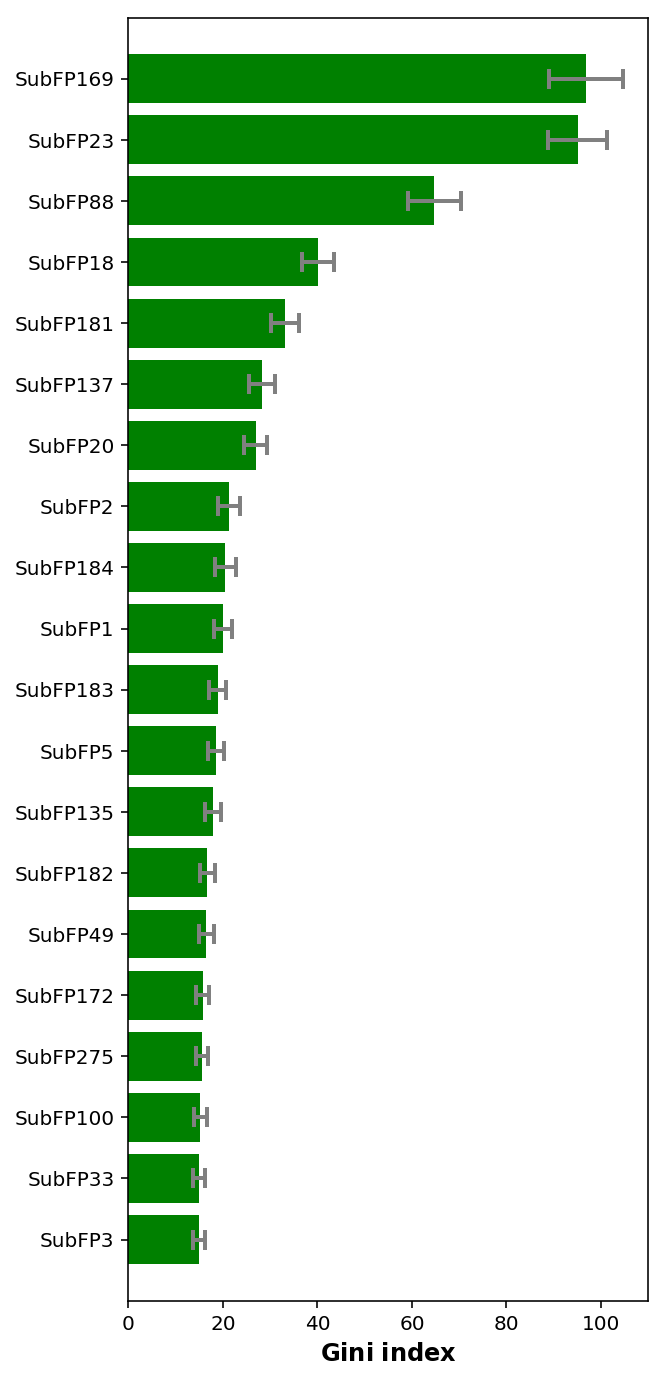

In [28]:
import glob # to read multiple files 
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import os

%config InlineBackend.figure_format = 'retina'

! rm Result/CHEMBL206_IC50_Revision.csv

outfile = open('Result/CHEMBL206_IC50_Revision.csv', 'a')

print >> outfile, 'Filename,N_train,Descriptors,Remove STDEV,Remove correlation,'+\
                    'R2_train,R2_train_std,' + \
                    'MAE_train,MAE_train_std,N_CV,Q2_CV,Q2_CV_std,MAE_CV,' + \
                    'MAE_CV_std,N_External,Q2_External,Q2_External_std,MAE_External,MAE_External_std'

path = r'QSAR/'

for f in glob.glob(path + '*.csv'):
    df = pd.read_csv(f)
    df = df.apply(lambda x: pd.to_numeric(x,errors='ignore'))
    df = df.fillna(method='ffill')
    Y = df["pIC50"].as_matrix().astype(np.float)
    data = df.ix[:,2:]
    
    print '\n\n************************************************************************************'
    print ''
    print (f)
    print ''
    
    data, des1, des2 = Remove_useless_descriptor(data, 0.05)  # Remove correlation cut off 95%
    data, des3, des4 = correlation(data, 0.7)  # Remove correlation cut off 0.7

    h = data.columns.tolist()
    hx = np.array(h)

    data = data.as_matrix().astype(np.float)
    X = np.array(data)
    
    # Prepare empty lists to plot QSAR model
    R2_train = []
    RMSE_train = []
    Q2_CV = []
    RMSE_CV = []
    Q2_External = []
    RMSE_External = []
    importances_dict = defaultdict(list)
    
    # Prepare empty lists to plot the performance of accuracy.
    acclist_realRF                          = []
    acclist_realRF_predictTrain             = []
    acclist_predictionOnTest_scrambledtrain  = []
    acclist_predictionOnTrain_scrambledtrain = []
        
    for i in range(10):
        R2_train, RMSE_train, Q2_CV, RMSE_CV, Q2_External, RMSE_External, Feature, \
           X_internal, X_external, Y_internal, Y_external, rf, prediction, importances_dict = build_model(X, Y, i, hx, f)
            
    acclist_predictionOnTest_scrambledtrain, acclist_predictionOnTrain_scrambledtrain = Y_scrambling( \
                                                                        X_internal, X_external, Y_internal, Y_external)
    R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, \
        RMSE_External_mean, importances_mean = mean(R2_train, RMSE_train, Q2_CV, RMSE_CV, \
                                 Q2_External, RMSE_External, importances_dict)
    R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std,\
        RMSE_External_std, importances_std = std(R2_train, RMSE_train, Q2_CV, RMSE_CV, \
                                 Q2_External, RMSE_External, importances_dict)
    print_output(R2_train_mean, RMSE_train_mean, Q2_CV_mean, RMSE_CV_mean, Q2_External_mean, 
           RMSE_External_mean, R2_train_std, RMSE_train_std, Q2_CV_std, RMSE_CV_std, Q2_External_std, 
           RMSE_External_std, X_internal, X_external, X, f, des1, des2)
    plot_model(f, X_internal, X_external, Y_internal, Y_external,
                R2_train_mean, Q2_External_mean,
                importances_mean, importances_std, Feature, prediction,
                acclist_predictionOnTest_scrambledtrain, acclist_predictionOnTrain_scrambledtrain)
    
outfile.close()
    #END